# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pickle
import seaborn as sns

import numpy as np
import pandas as pd
from collections import Counter

from matplotlib import pyplot as plt
from Modelling import AdaptiveTimeline
from Visualisations import AlgorithmPlotter

from IPython.display import display
pd.options.display.max_columns = None

import importlib
del AlgorithmPlotter
from Visualisations import AlgorithmPlotter
from Visualisations import PredictionPlotter
importlib.reload(AlgorithmPlotter)

<module 'Visualisations.AlgorithmPlotter' from 'C:\\Users\\jadec\\kDrive\\PhD\\Phet\\phet-capacitor-lab\\Code\\Visualisations\\AlgorithmPlotter.py'>

# Functions

In [3]:
def readSummary(summary, typ):
    if typ == 'ML':
        path = '../Objects/summaries/ML/'
    if typ == 'DL':
        path = '../Objects/summaries/DL/'
    with open(path + summary, 'rb') as fp:
        summary = pickle.load(fp)
    
    summary.viewScores('all_test_overall_auc_mean')
    summary.save()
    return summary

In [4]:
summary_name = 'randomforest_classification_normalskipgram60_average_60.pkl'

In [5]:
s = readSummary(summary_name, 'ML')

In [6]:
s.scores['all_test_balanced_accuracy_mean'].unique()

array([0.38253968, 0.4452381 , 0.39444444, 0.34365079, 0.38194444,
       0.42440476, 0.43234127, 0.29126984, 0.28392857, 0.39503968,
       0.39424603, 0.33670635, 0.37142857, 0.37539683, 0.32996032,
       0.27777778, 0.4047619 , 0.36587302, 0.31884921, 0.29186508,
       0.41329365, 0.38829365, 0.32103175, 0.36309524, 0.32281746,
       0.30714286, 0.32460317, 0.4172619 , 0.30198413, 0.31805556,
       0.29007937, 0.29900794, 0.26170635, 0.38730159, 0.31686508,
       0.19980159, 0.27142857, 0.31626984, 0.28511905, 0.29801587,
       0.22440476, 0.28492063, 0.26448413, 0.33373016, 0.32400794,
       0.38353175, 0.32063492, 0.34880952, 0.29166667, 0.3109127 ,
       0.26746032, 0.28730159, 0.42559524, 0.30634921, 0.32083333,
       0.28412698, 0.3484127 , 0.40138889, 0.34464286, 0.32916667,
       0.34583333, 0.29404762, 0.25892857, 0.31666667, 0.37261905,
       0.41666667, 0.31289683, 0.30615079, 0.24107143, 0.28869048,
       0.3718254 , 0.21785714, 0.35753968, 0.32142857, 0.30793

In [23]:
lengths = list(range(10, 300, 10))

In [7]:
def readSummaries(summary_name, typ, columns, params, lengths):
    scores = {
    'summaries': [],
    'entries': []
    }
    for l in lengths:
        path = summary_name + str(l) + '.pkl'
        summary = readSummary(path, typ)
        entry = summary.getAUCindex(columns)
        scores['summaries'].append(summary)
        scores['entries'].append(entry)
        
    scores['lengths'] = lengths
    scores['algo_name'] = params['name']
    scores['algorithm'] = params['algorithm']
    scores['features'] = params['features']

    performances = [
        'accuracy', 'recall', 'auc'
    ]
    algo_plotter = AlgorithmPlotter.AlgorithmPlotter('hello')
    algo_plotter.plotSummariesWithin(scores, performances, columns, save_figure=True, show_figure=True)

    with open('../Objects/results/' + params['name'] + '.pkl', 'wb') as fp:
        pickle.dump(scores, fp)

# Random Forest

## Pairwise skipgram

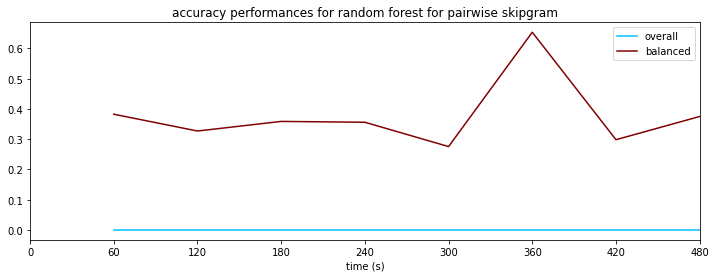

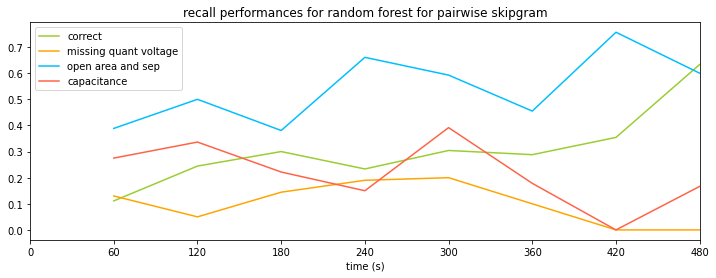

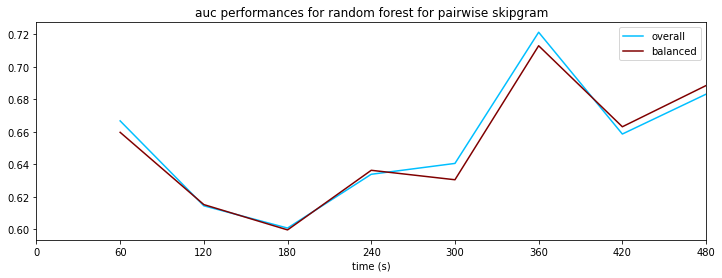

In [44]:
lengths = list(range(60, 481, 60))
summary_name = 'randomforest_classification_normalskipgram60_average_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'random forest for pairwise skipgram'
params['algorithm'] = 'random forest'
params['features'] = 'pairwise skipgram'
readSummaries(summary_name, typ, columns, params, lengths)

## Reverse Skipgram

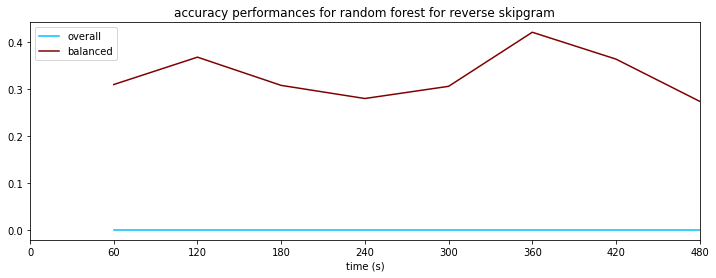

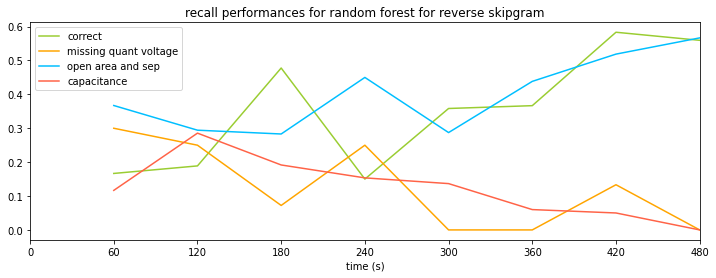

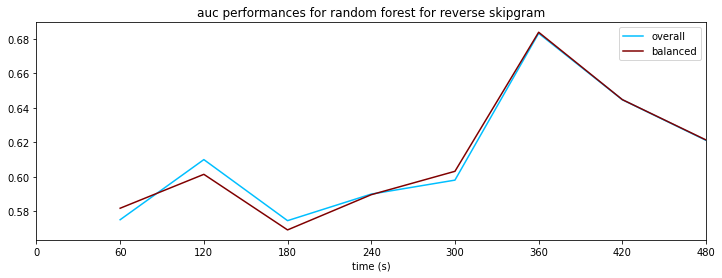

In [47]:
summary_name = 'randomforest_classification_reversedskipgram60_average_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'random forest for reverse skipgram'
params['algorithm'] = 'random forest'
params['features'] = 'reverse skipgram'
readSummaries(summary_name, typ, columns, params, lengths)

## Raw

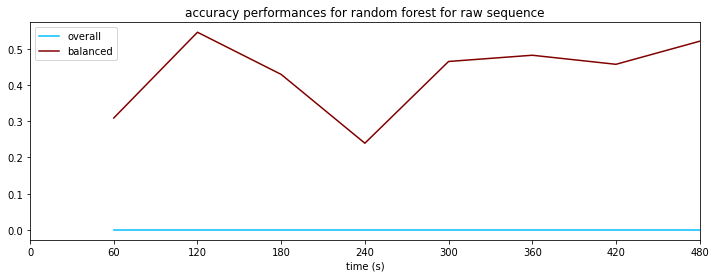

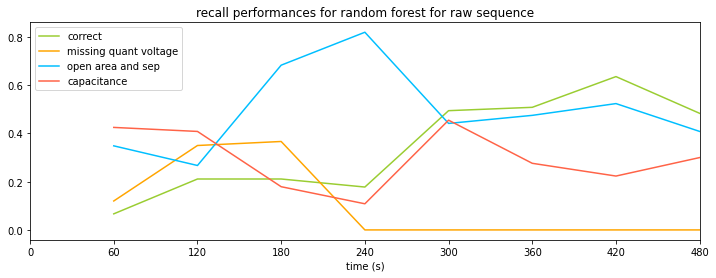

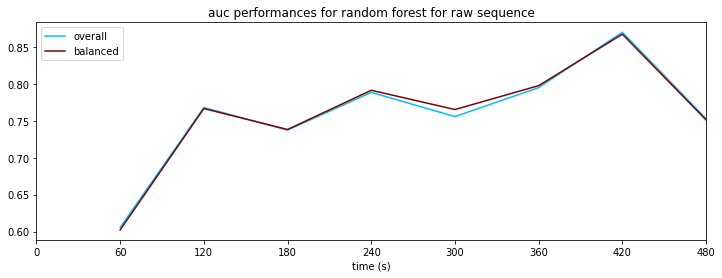

In [48]:
summary_name = 'randomforest_classification_raw60_average_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'random forest for raw sequence'
params['algorithm'] = 'random forest'
params['features'] = 'raw sequence'
readSummaries(summary_name, typ, columns, params, lengths)

## Static activity

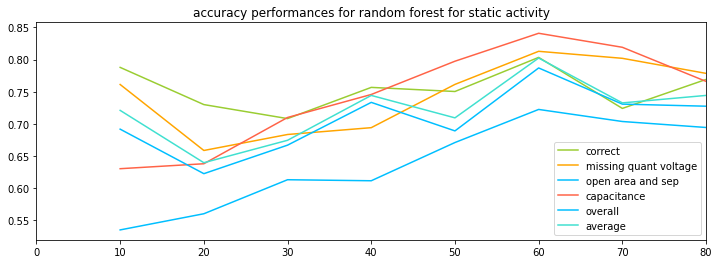

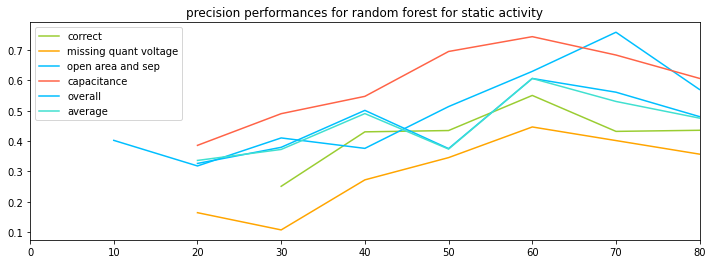

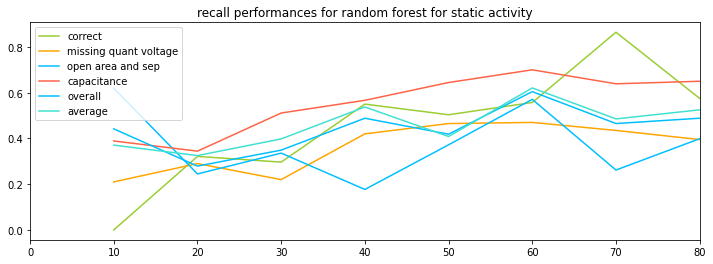

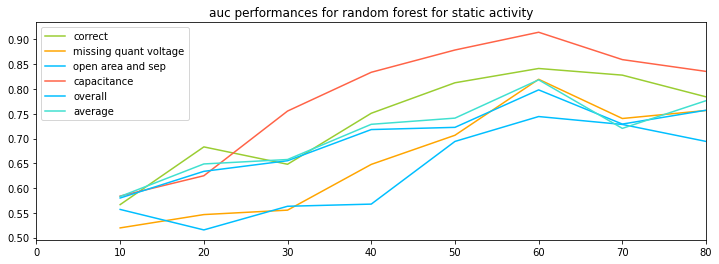

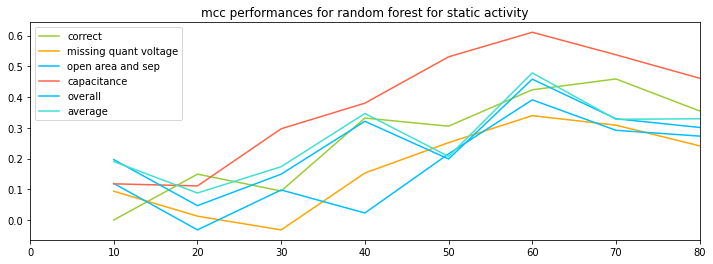

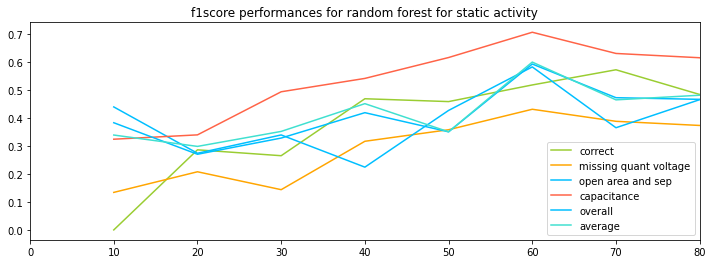

In [21]:
summary_name = 'randomforest_classification_sums_normalised_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'random forest for static activity'
params['algorithm'] = 'random forest'
params['features'] = 'static activity'
readSummaries(summary_name, typ, columns, params)

# Neural Network

## Pairwise Skipgram

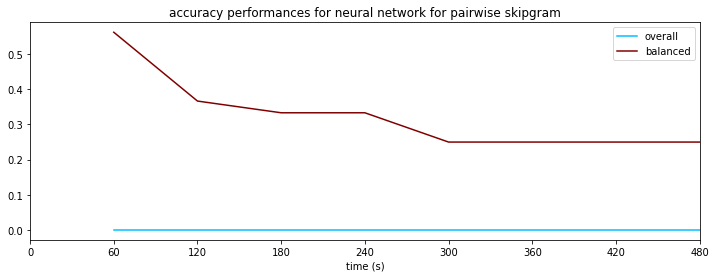

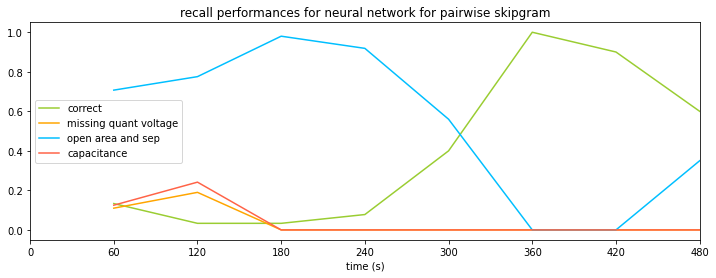

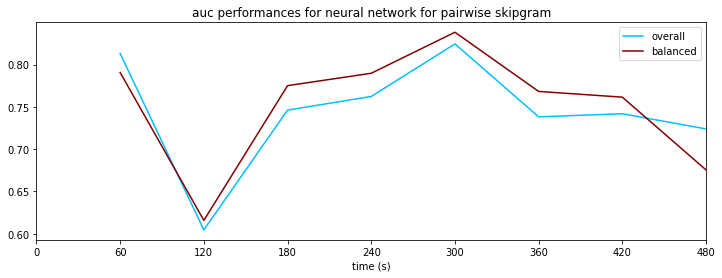

In [49]:
lengths = list(range(60, 481, 60))
summary_name = 'nn_classification_normalskipgram60_average_'
typ = 'DL'
columns = ['epochs', 'batch_size', 'dense units']
params = {}
params['name'] = 'neural network for pairwise skipgram'
params['algorithm'] = 'neural network'
params['features'] = 'pairwise skipgram'
readSummaries(summary_name, typ, columns, params, lengths)

## Reverse Skipgram

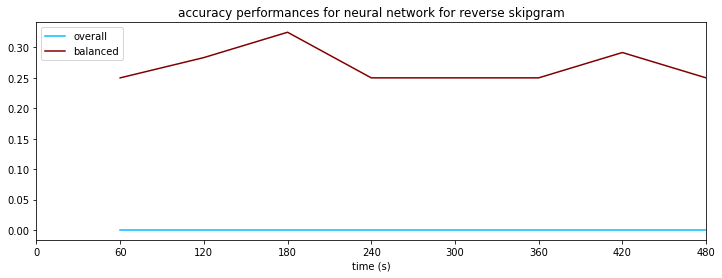

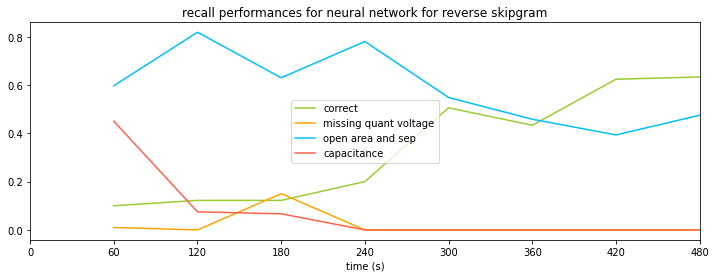

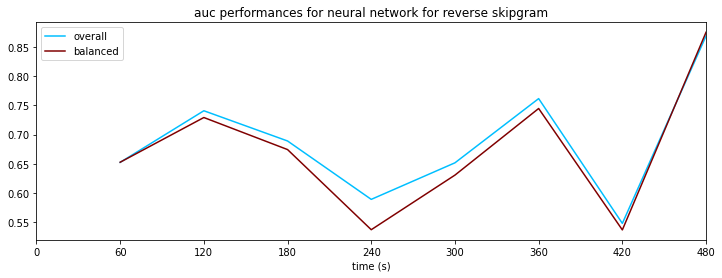

In [51]:
summary_name = 'nn_classification_reversedskipgram60_average_'
typ = 'DL'
columns = ['epochs', 'batch_size', 'dense units']
params = {}
params['name'] = 'neural network for reverse skipgram'
params['algorithm'] = 'neural network'

params['features'] = 'reverse skipgram'
readSummaries(summary_name, typ, columns, params, lengths)

## Raw sequence

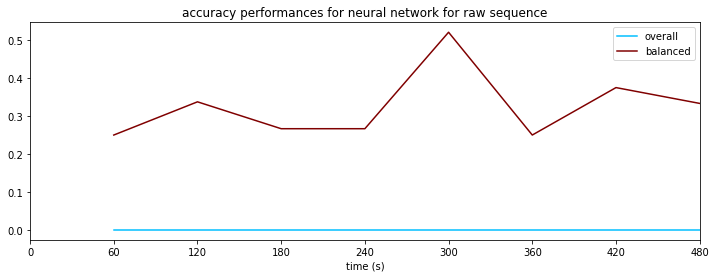

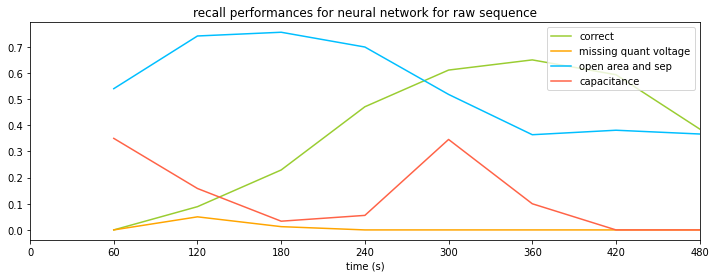

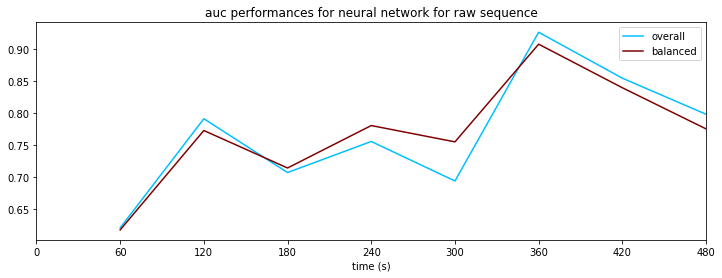

In [52]:
summary_name = 'nn_classification_raw60_average_'
typ = 'DL'
columns = ['epochs', 'batch_size', 'dense units']
params = {}
params['name'] = 'neural network for raw sequence'
params['algorithm'] = 'neural network'
params['features'] = 'raw sequence'
readSummaries(summary_name, typ, columns, params, lengths)

## Static activity

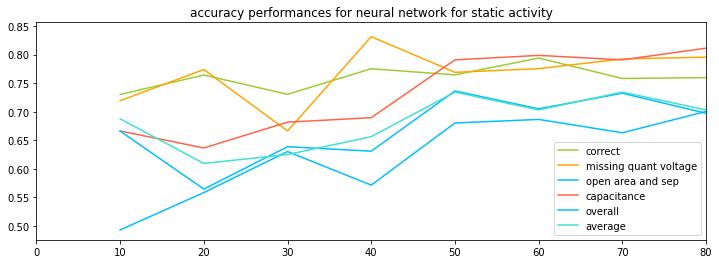

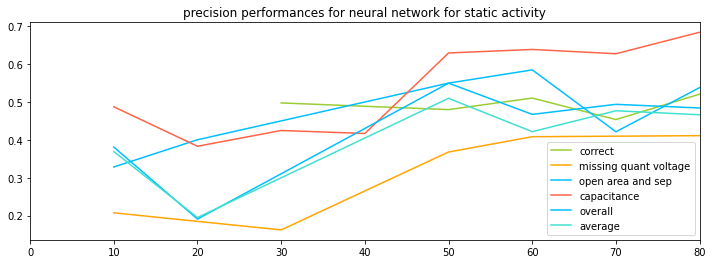

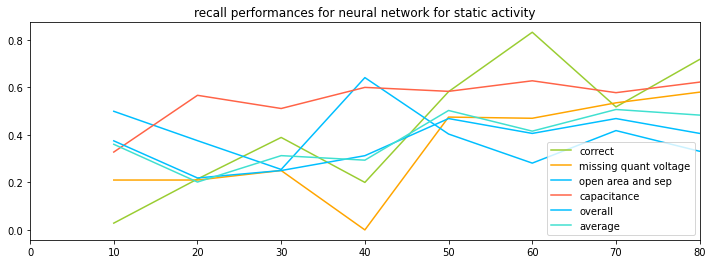

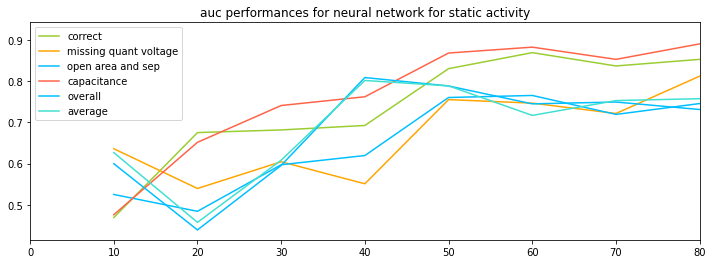

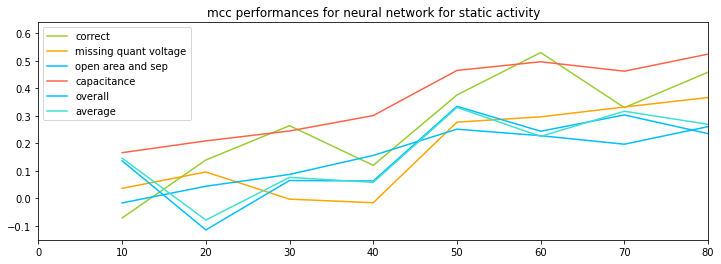

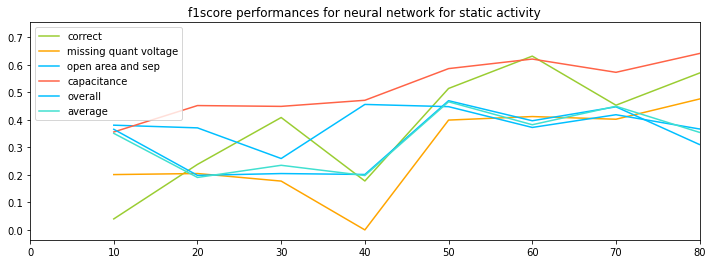

In [24]:
summary_name = 'nn_classification_sums_nonnormalised_'
typ = 'DL'
columns = ['epochs', 'batch_size', 'dense units']
params = {}
params['name'] = 'neural network for static activity'
params['algorithm'] = 'neural network'
params['features'] = 'static activity'
readSummaries(summary_name, typ, columns, params)

# Multivariate Random Forest

## Pairwise Skipgram

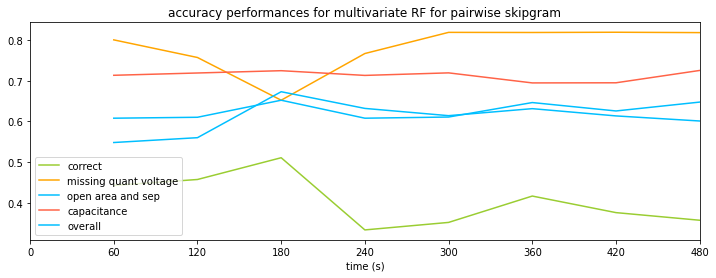

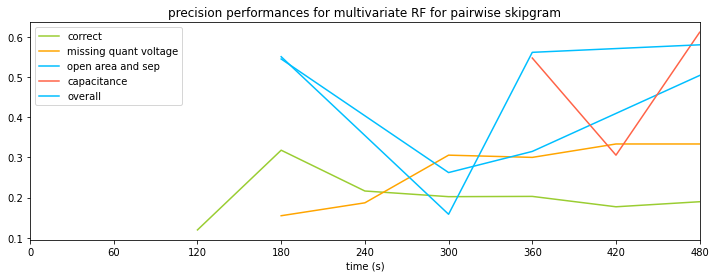

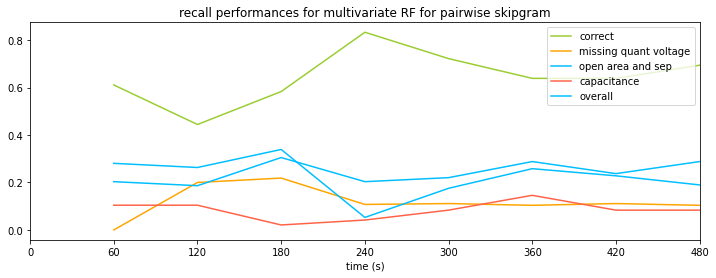

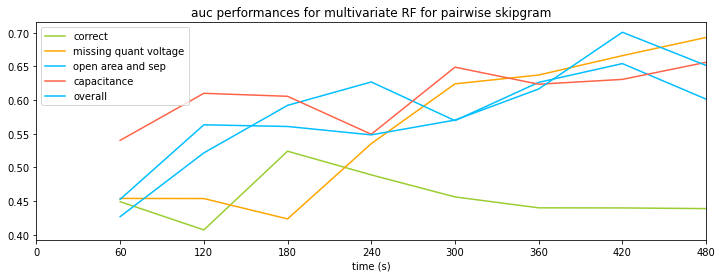

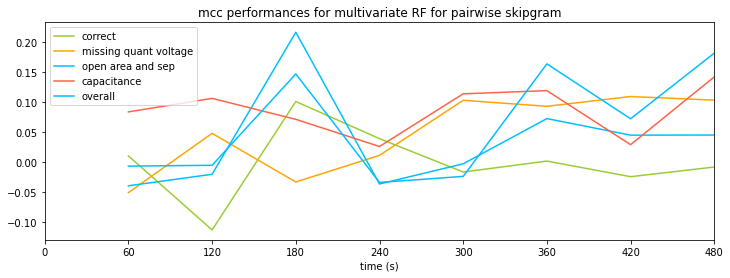

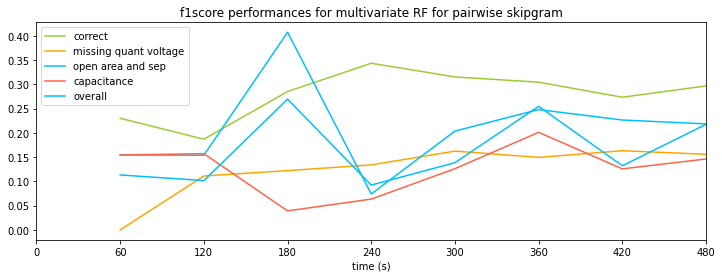

In [89]:
lengths = list(range(60, 481, 60))
summary_name = 'temp_mvrandomforest_classification_normalskipgram60_average_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'multivariate RF for pairwise skipgram'
params['algorithm'] = 'multivariate RF'
params['features'] = 'pairwise skipgram'
readSummaries(summary_name, typ, columns, params, lengths)

## Reverse Skipgram

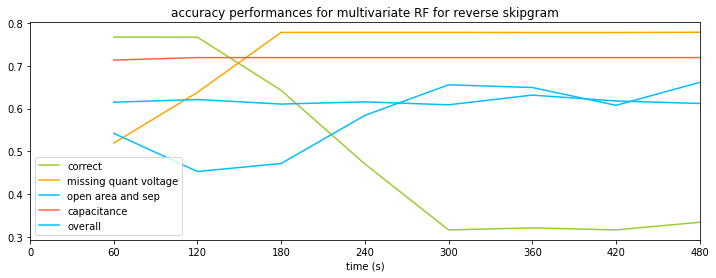

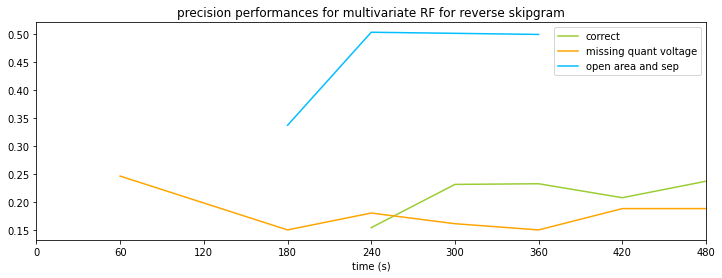

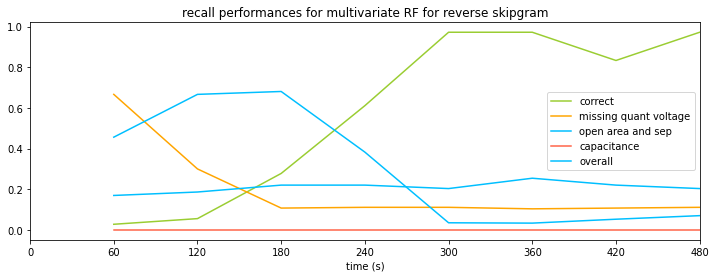

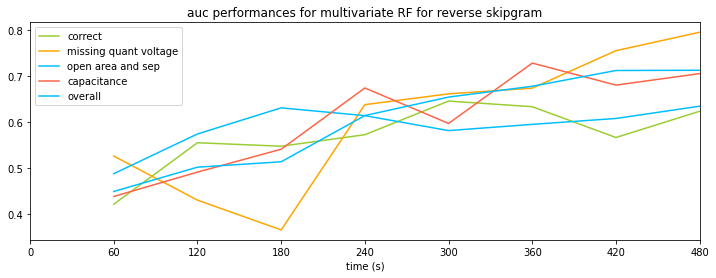

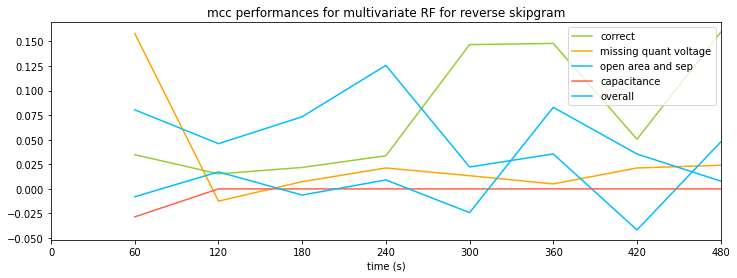

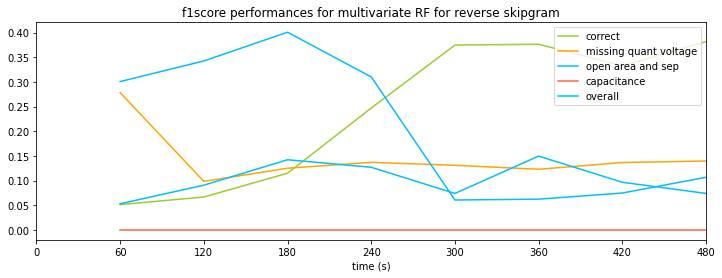

In [90]:
summary_name = 'temp_mvrandomforest_classification_reversedskipgram60_flatten_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'multivariate RF for reverse skipgram'
params['algorithm'] = 'multivariate RF'
params['features'] = 'reverse skipgram'
readSummaries(summary_name, typ, columns, params, lengths)

## Raw sequence

In [68]:
summary_name = 'temp_mvrandomforest_classification_raw60_average_'
typ = 'ML'
columns = ['#tree', 'criterion', 'depth', 'min split']
params = {}
params['name'] = 'multivariate RF for raw sequence'
params['algorithm'] = 'multivariate RF'
params['features'] = 'raw sequence'
readSummaries(summary_name, typ, columns, params, lengths)

FileNotFoundError: [Errno 2] No such file or directory: '../Objects/summaries/ML/temp_mvrandomforest_classification_raw60_average_60.pkl'

# Summary Plots

## Comparison

In [53]:
algo_plotter = AlgorithmPlotter.AlgorithmPlotter('hello')

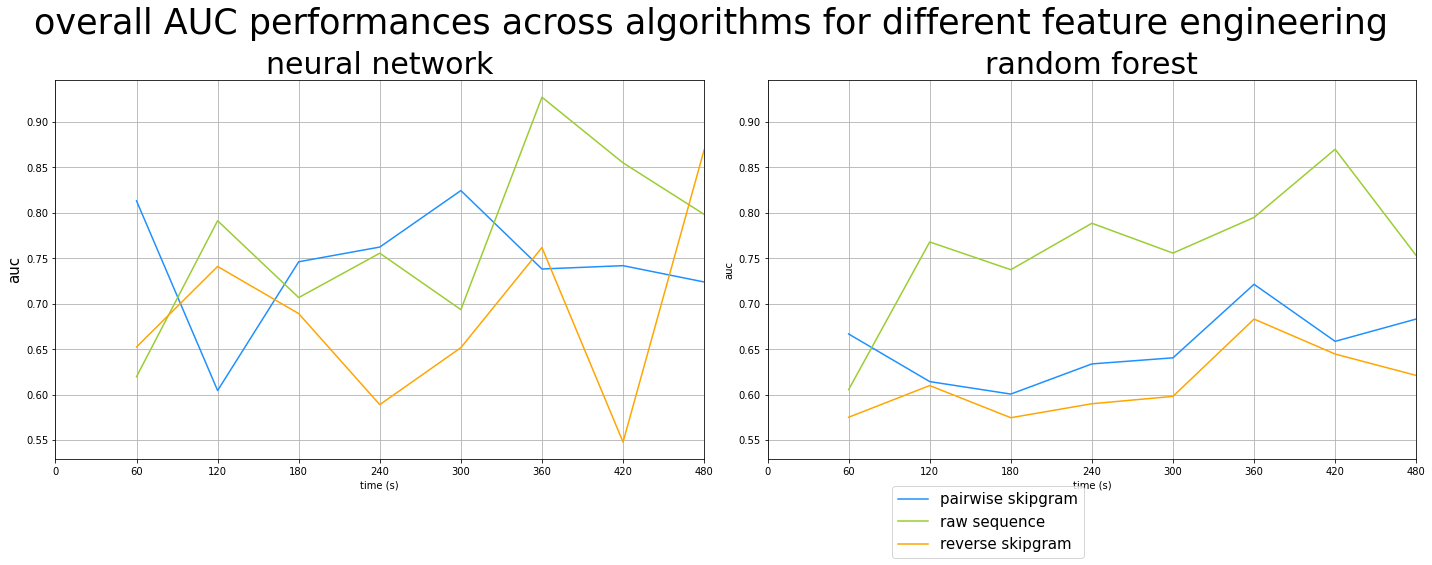

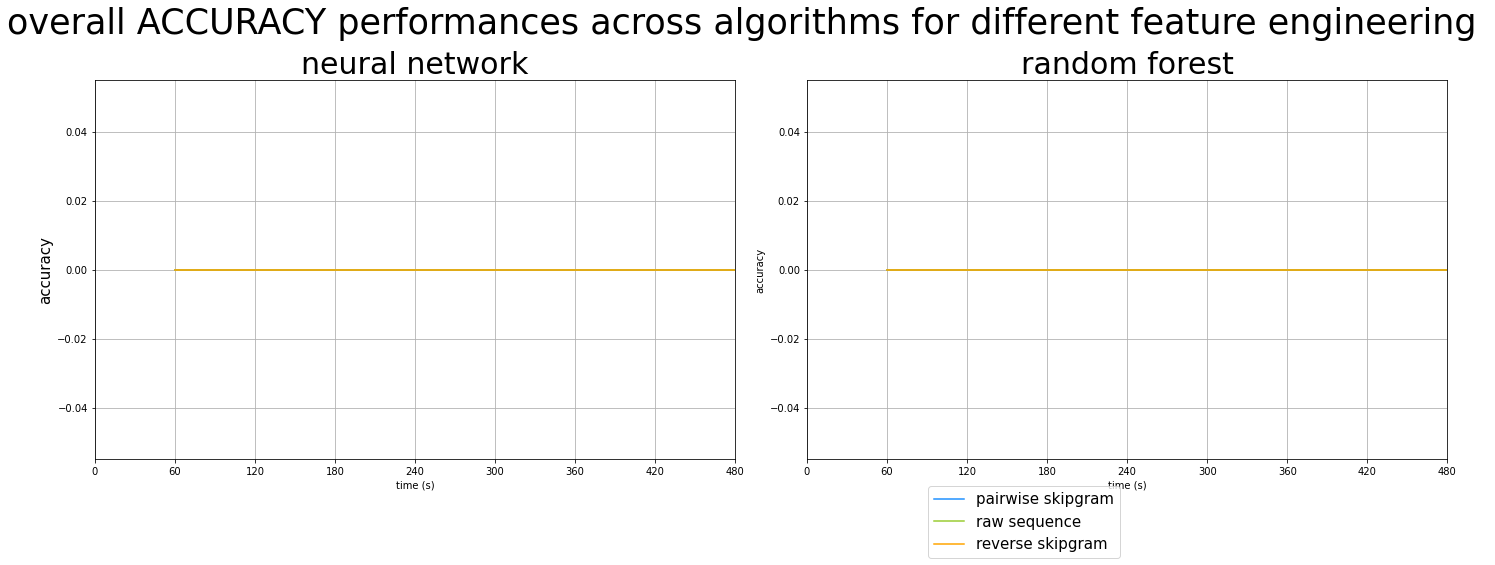

No handles with labels found to put in legend.


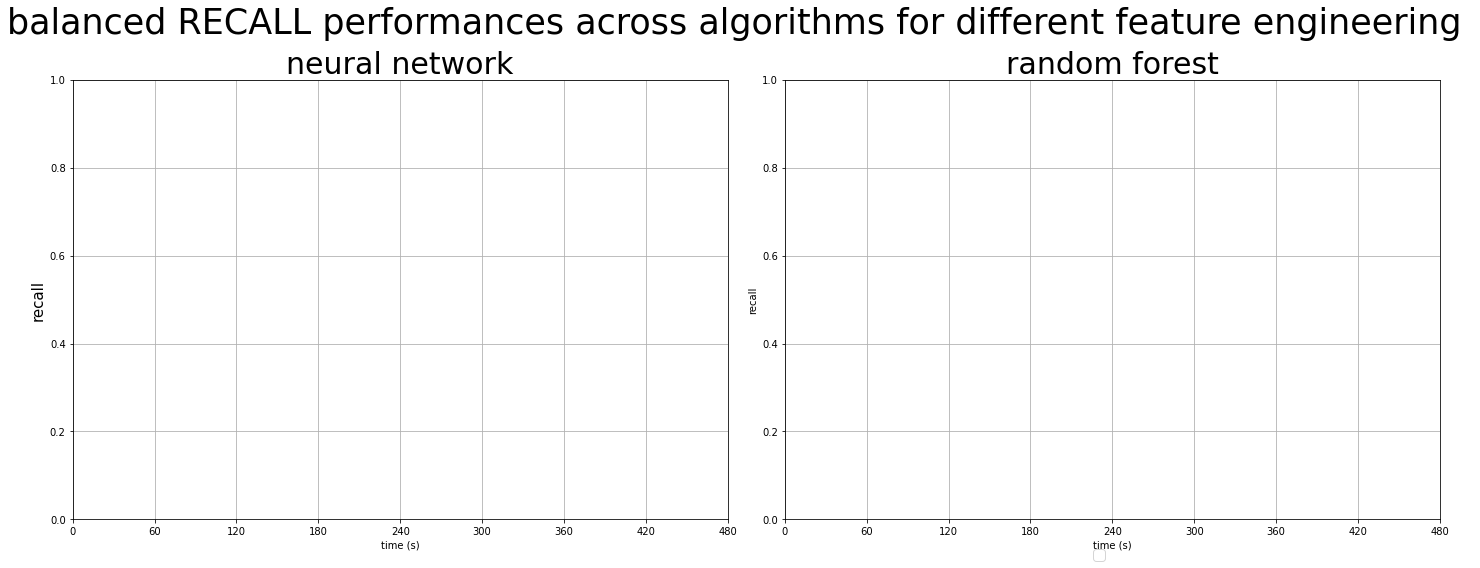

In [56]:
directory = '../Objects/results/seconds - no padding/'
algo_plotter.plotAcrossAlgo(directory, 'auc', 'overall', save_figure=True, show_figure=True)
algo_plotter.plotAcrossAlgo(directory, 'accuracy', 'overall', save_figure=True, show_figure=True)
algo_plotter.plotAcrossAlgo(directory, 'recall', 'balanced', save_figure=True, show_figure=True)

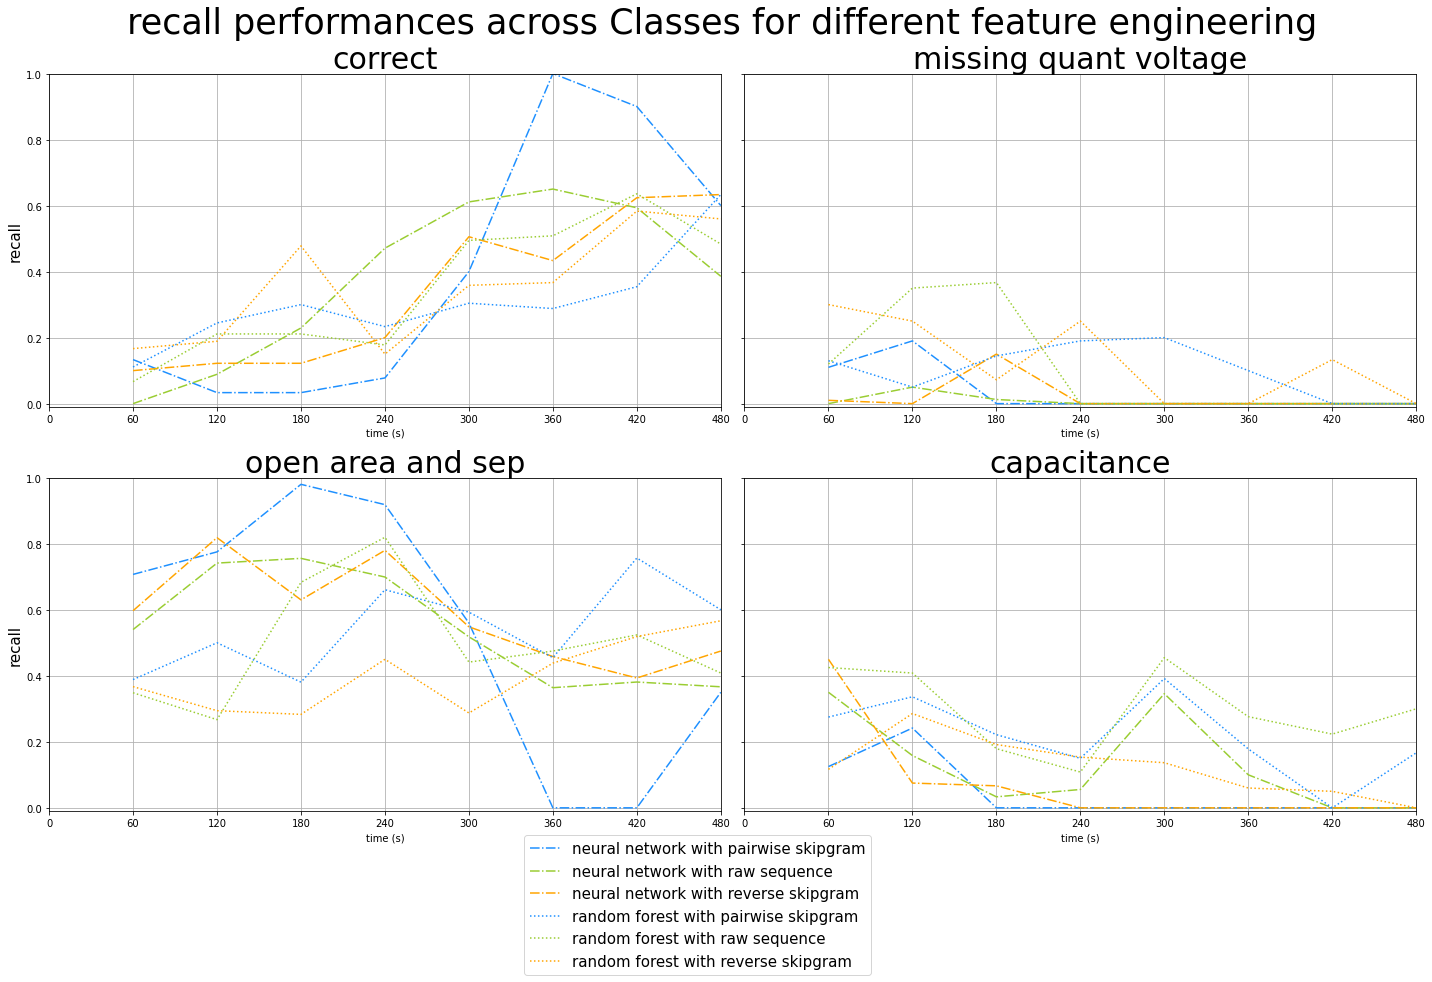

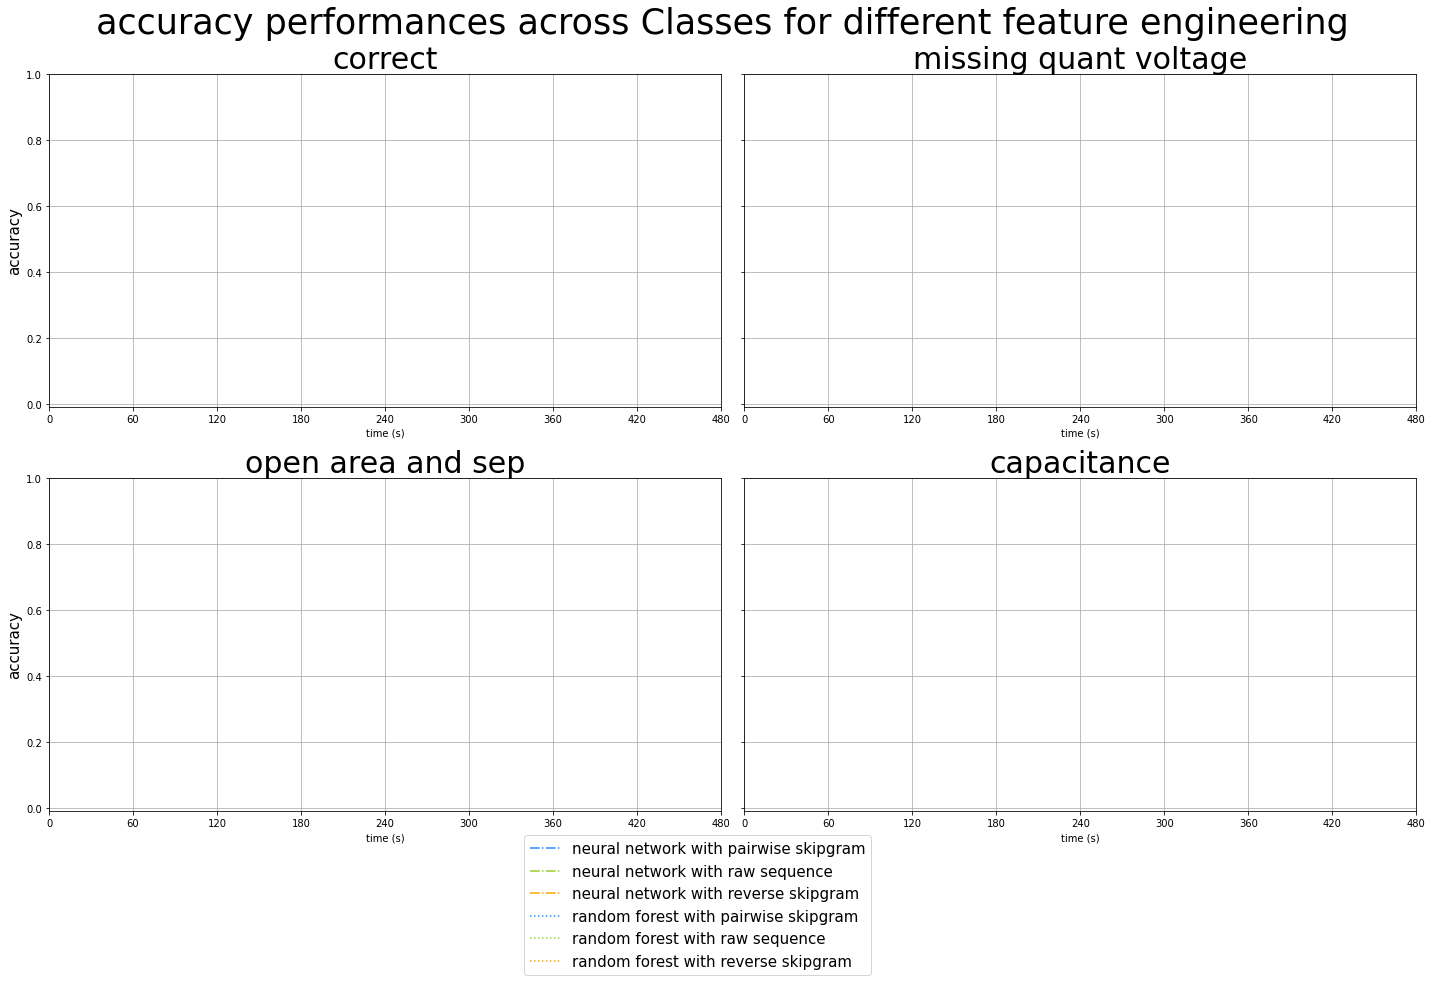

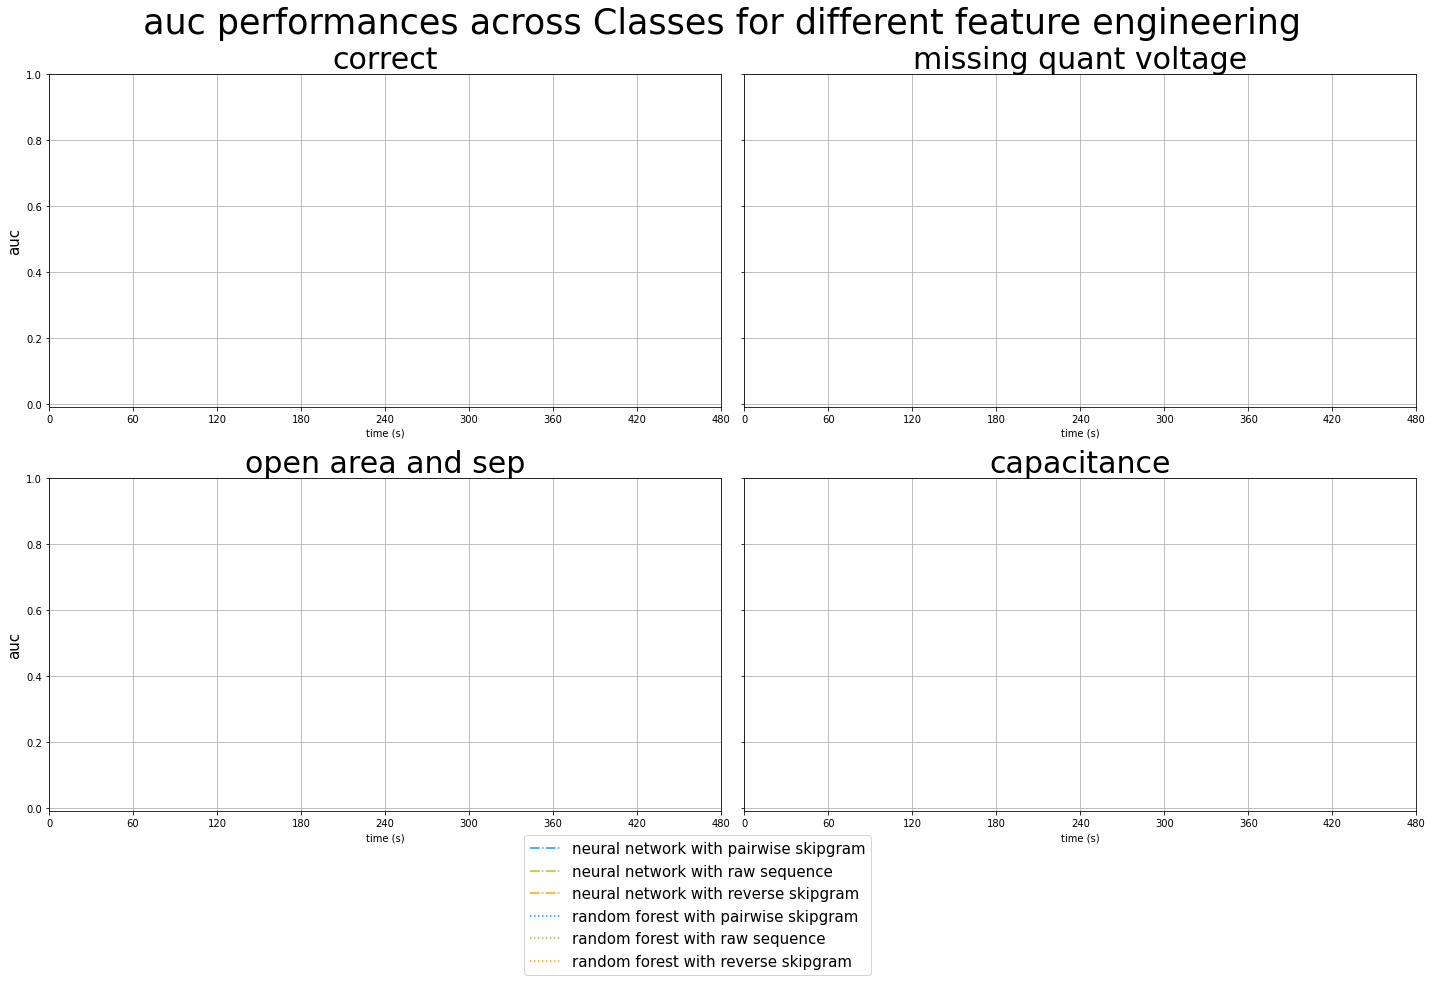

In [57]:
directory = '../Objects/results/seconds - no padding/'

algo_plotter.plotAcrossClass(directory, 'recall', '', save_figure=True, show_figure=True)

algo_plotter.plotAcrossClass(directory, 'accuracy', '', save_figure=True, show_figure=True)

algo_plotter.plotAcrossClass(directory, 'auc', '', save_figure=True, show_figure=True)


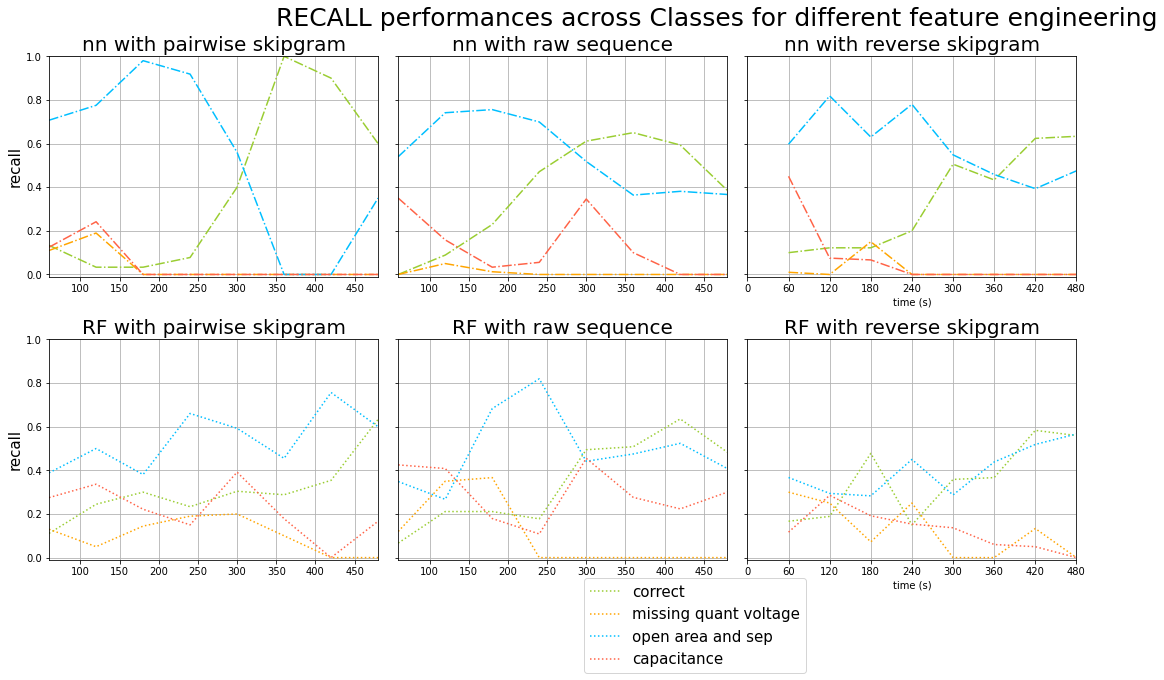

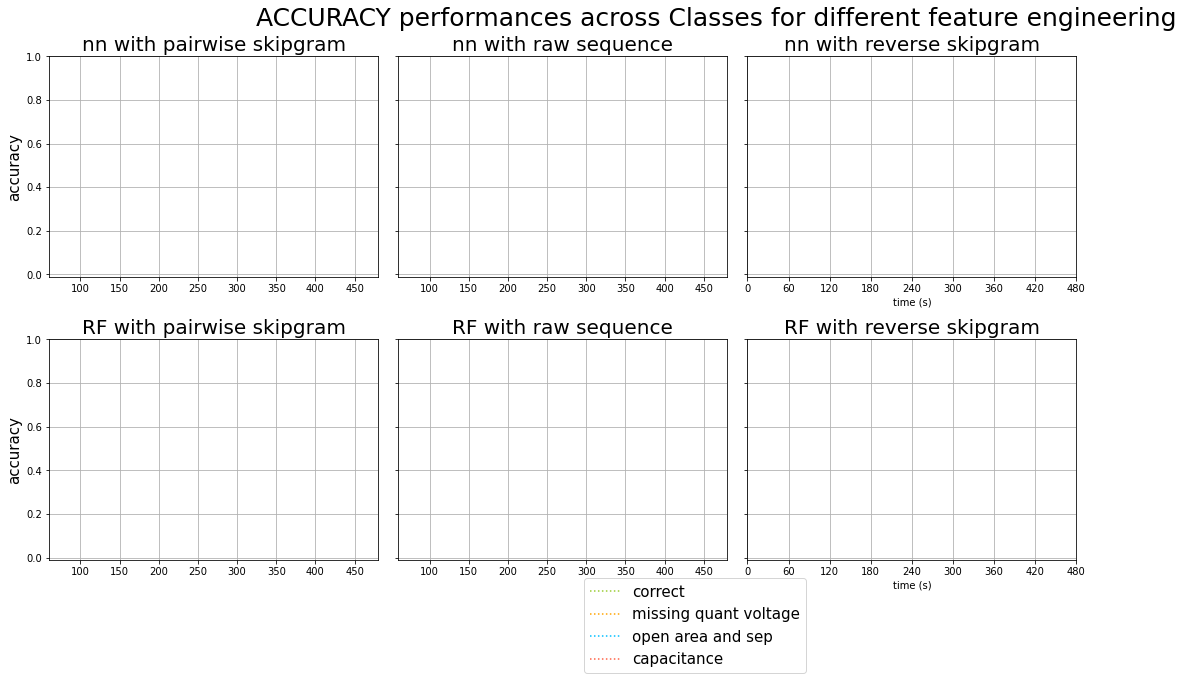

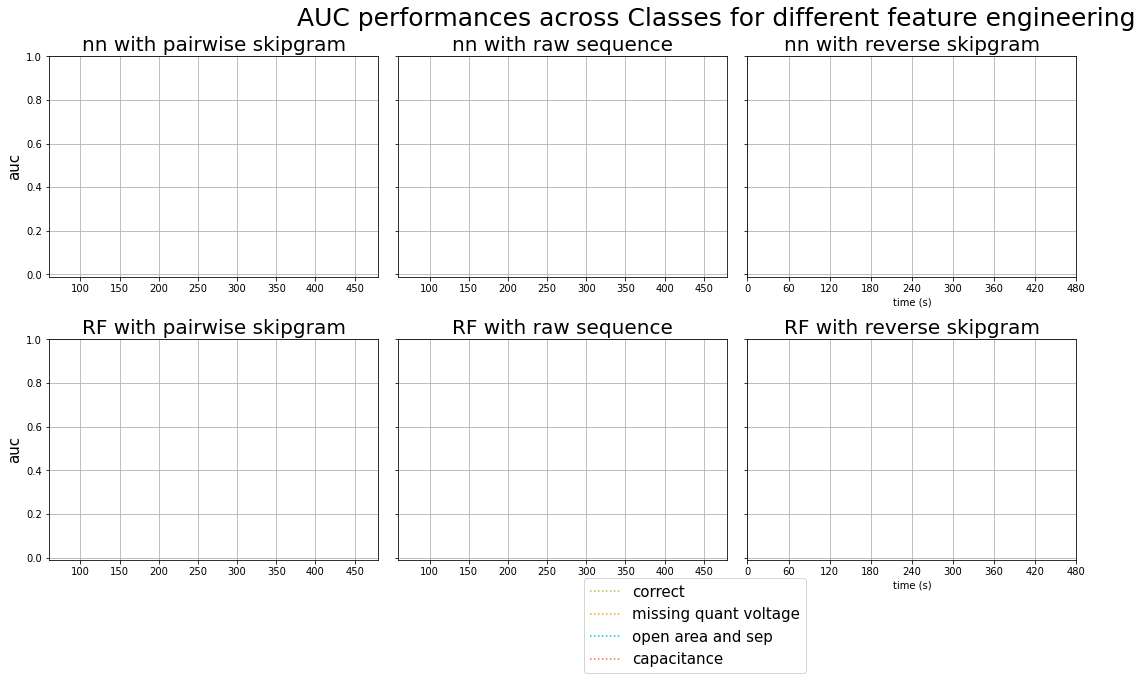

In [61]:
directory = '../Objects/results/seconds - no padding/'
algo_plotter.plotAcrossAlgoFeature(directory, 'recall', 'average', save_figure=False, show_figure=True)

algo_plotter.plotAcrossAlgoFeature(directory, 'accuracy', 'average', save_figure=False, show_figure=True)

algo_plotter.plotAcrossAlgoFeature(directory, 'auc', 'average', save_figure=False, show_figure=True)


## Embeddings

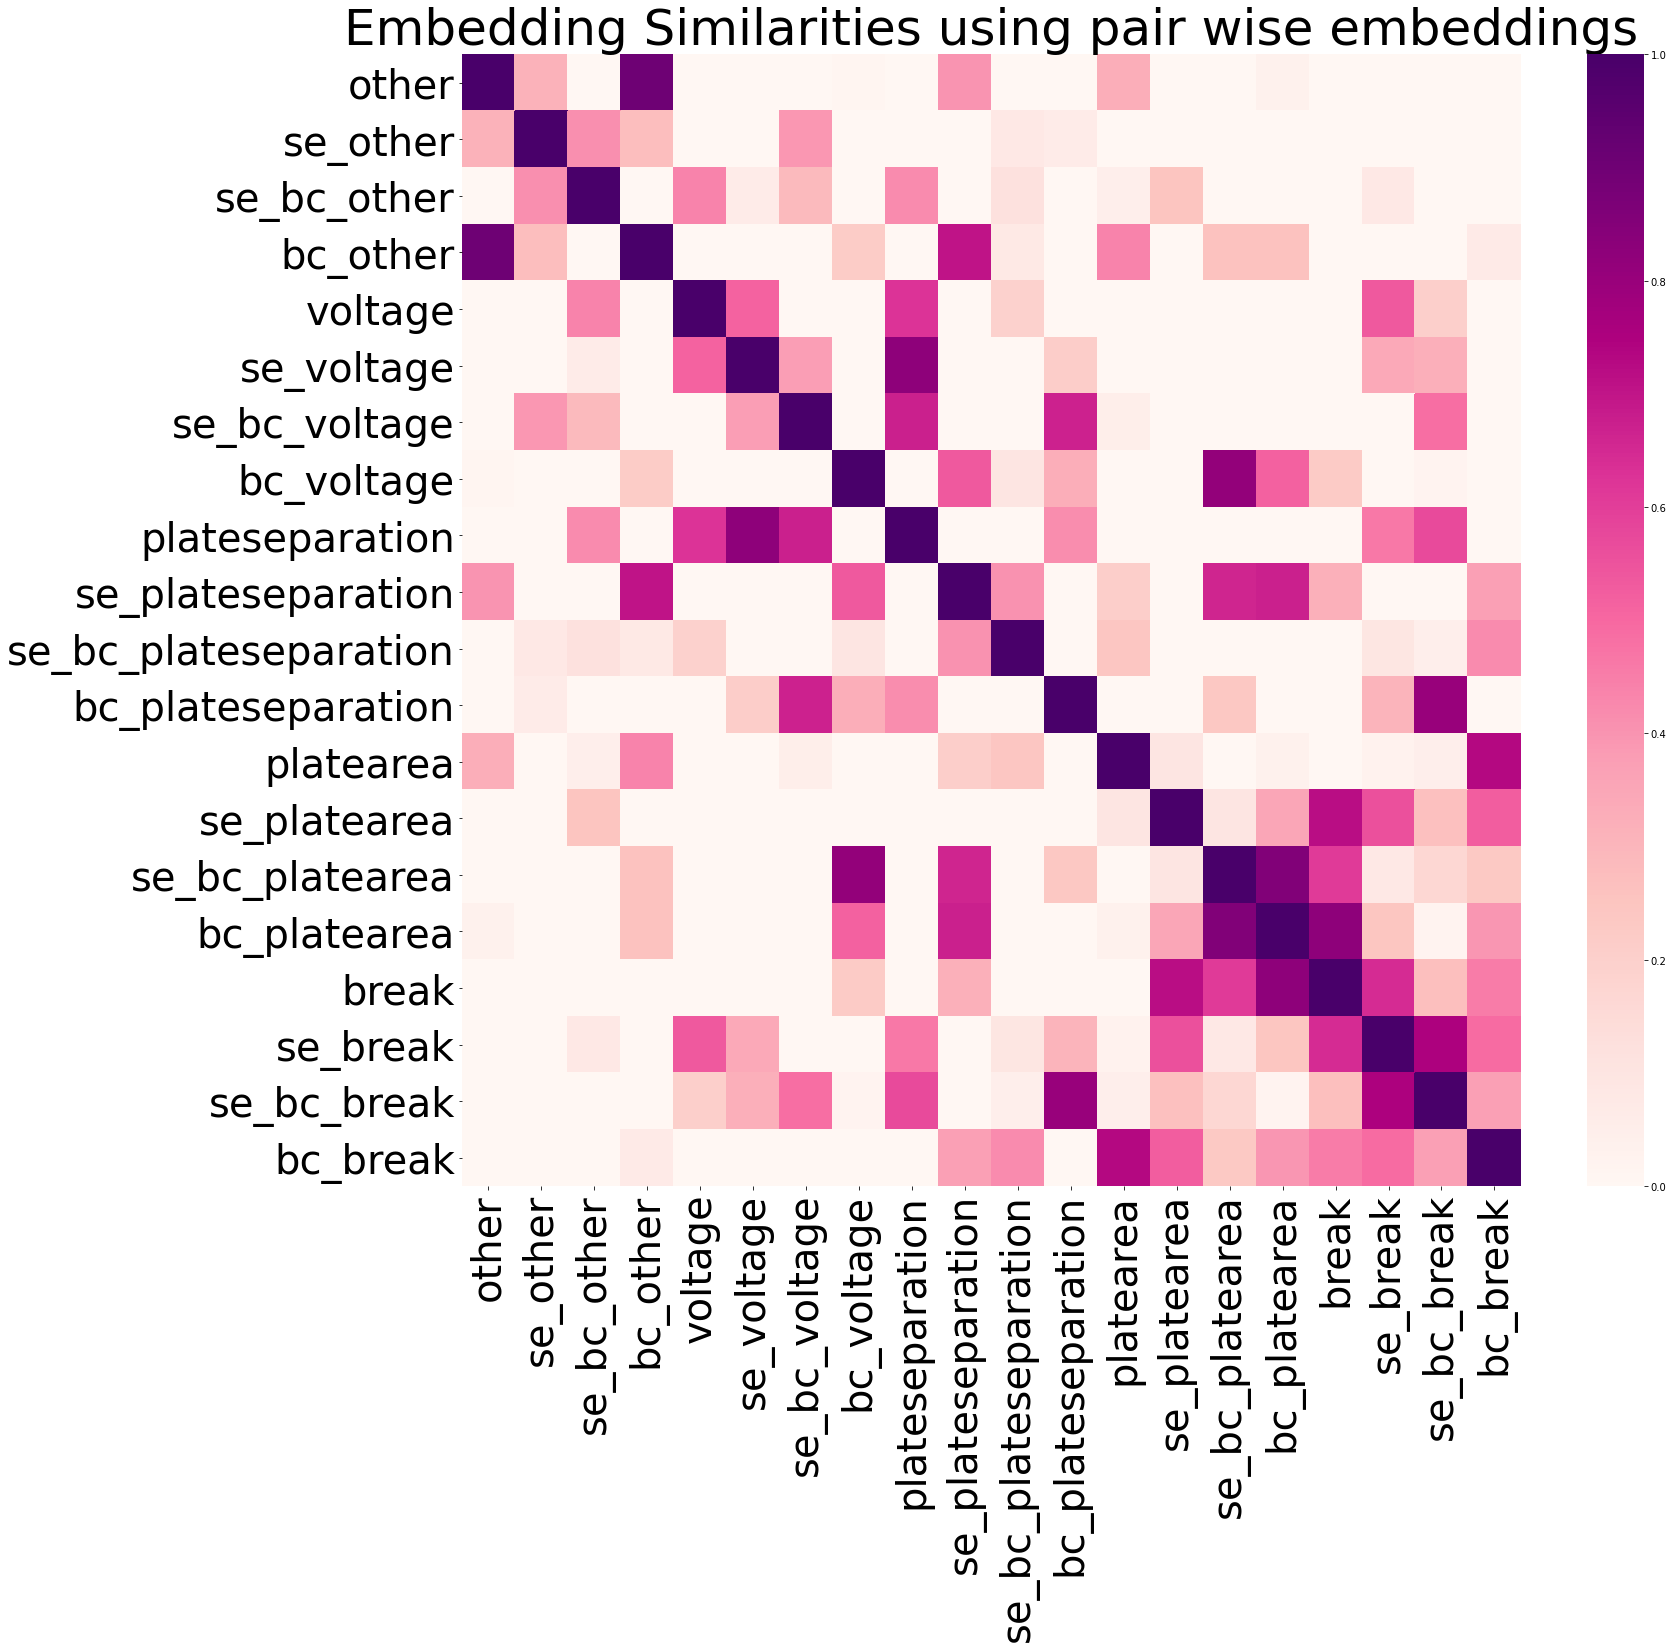

In [5]:
path = '../Objects/models/pairwise_embedder/final_pairwise_skipgram.pkl'  
with open(path, 'rb') as fp:
    embedder = pickle.load(fp)

algo_plotter.plotEmbeddingHeatmaps(embedder, 'cumul60', save_image=True, show_image=True)

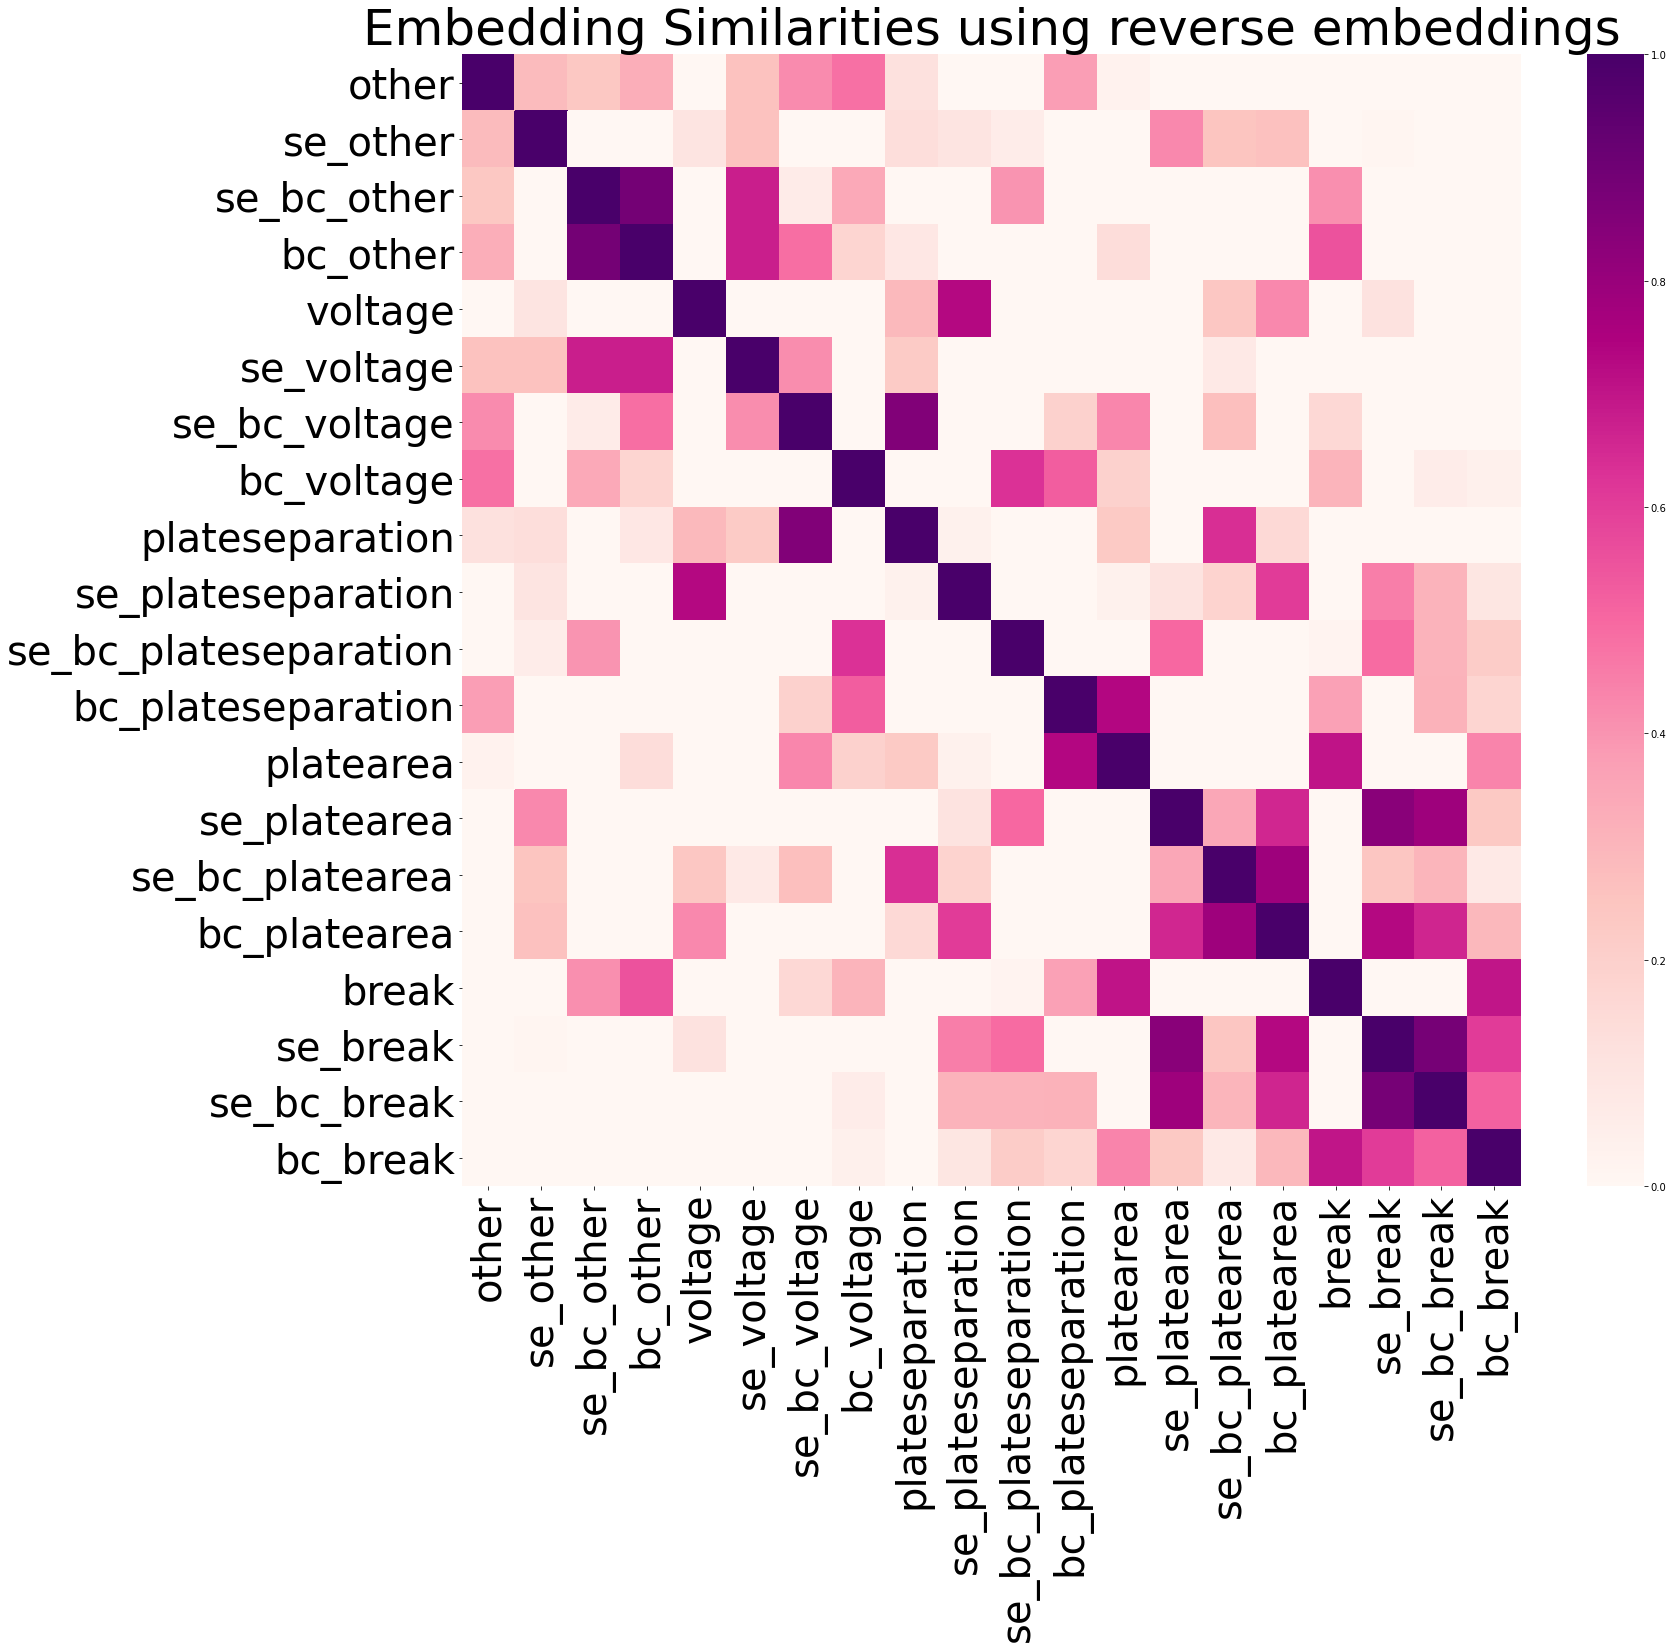

In [6]:
path = '../Objects/models/reversed_embedder/final_reversed_skipgram.pkl'  
with open(path, 'rb') as fp:
    embedder = pickle.load(fp)

algo_plotter.plotReversedEmbeddingHeatmaps(embedder, 'cumul60', ['other', 'se_other', 'se_bc_other', 'bc_other', 'voltage', 'se_voltage', 'se_bc_voltage', 'bc_voltage', 'plateseparation', 'se_plateseparation', 'se_bc_plateseparation', 'bc_plateseparation', 'platearea', 'se_platearea', 'se_bc_platearea', 'bc_platearea', 'break', 'se_break', 'se_bc_break', 'bc_break'], save_image=True, show_image=True)

In [ ]:
embedder.index_state

# Summary keys

In [83]:
with open('../Objects/data keys/group_id_timelines.pkl', 'rb') as fp:
    id_timelines = pickle.load(fp)
lengths = list(range(0, 1000, 10))

In [84]:
perm_map = {
    'correct': 'correct', 'qualvoltage': 'missing quant voltage', 
    'oparsep': 'open area and sep', 'capacitance':'capacitance' 
}

length_students = {}
length_students = {
    'correct' : {},
    'missing quant voltage': {},
    'open area and sep' : {},
    'capacitance': {},
    'overall': {},
}
for l in lengths:
    length_students['correct'][l] = 0
    length_students['missing quant voltage'][l] = 0
    length_students['open area and sep'][l] = 0
    length_students['capacitance'][l] = 0
    length_students['overall'][l] = 0
    for iid in id_timelines:
        timeline = id_timelines[iid]
        if timeline.limit['cumul60_seconds'] >= l:
            length_students[perm_map[timeline.group]][l] += 1
            length_students['overall'][l] += 1


In [85]:
length_students

{'correct': {0: 40,
  10: 39,
  20: 39,
  30: 39,
  40: 39,
  50: 39,
  60: 39,
  70: 39,
  80: 39,
  90: 39,
  100: 39,
  110: 39,
  120: 39,
  130: 38,
  140: 38,
  150: 38,
  160: 38,
  170: 38,
  180: 38,
  190: 38,
  200: 38,
  210: 38,
  220: 38,
  230: 38,
  240: 38,
  250: 37,
  260: 37,
  270: 37,
  280: 37,
  290: 37,
  300: 37,
  310: 34,
  320: 34,
  330: 34,
  340: 34,
  350: 34,
  360: 34,
  370: 30,
  380: 30,
  390: 30,
  400: 30,
  410: 30,
  420: 30,
  430: 27,
  440: 27,
  450: 27,
  460: 27,
  470: 27,
  480: 27,
  490: 19,
  500: 19,
  510: 19,
  520: 19,
  530: 19,
  540: 19,
  550: 15,
  560: 15,
  570: 15,
  580: 15,
  590: 15,
  600: 15,
  610: 12,
  620: 12,
  630: 12,
  640: 12,
  650: 12,
  660: 12,
  670: 11,
  680: 11,
  690: 11,
  700: 11,
  710: 11,
  720: 11,
  730: 10,
  740: 10,
  750: 10,
  760: 10,
  770: 10,
  780: 10,
  790: 6,
  800: 6,
  810: 6,
  820: 6,
  830: 6,
  840: 6,
  850: 6,
  860: 6,
  870: 6,
  880: 6,
  890: 6,
  900: 6,
  910: 5,
 

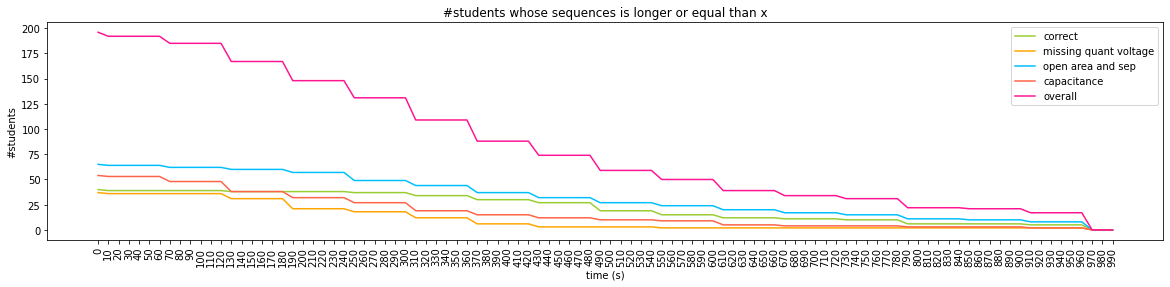

In [88]:
palette = {
    'correct': 'yellowgreen',
    'missing quant voltage': 'orange',
    'open area and sep': 'deepskyblue',
    'capacitance': 'tomato',
    'average': 'turquoise',
    'overall': 'deeppink', 
}

plt.figure(figsize=(20, 4))
plt.title('#students whose sequences is longer or equal than x')
for group in length_students:
    sns.lineplot(x=lengths, y=length_students[group].values(), color=palette[group], label=group)
    
plt.xticks(lengths, rotation=90)
plt.ylabel('#students')
plt.xlabel('time (s)')
plt.legend()
plt.show()

# Test

In [94]:
a = np.array([[1, 2, 3], [2, 4, 2]])

In [95]:
a

array([[1, 2, 3],
       [2, 4, 2]])

In [96]:
a[:, 1] = 4

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import shuffle

In [42]:
model = RandomForestClassifier(
            n_estimators=3,
            criterion='gini',
            max_depth=2,
            max_leaf_nodes=None
        )

In [57]:
model.fit([[1, 2], [2, 1], [1, 2], [2, 1], [4, 4], [4, 4]], [1, 3, 1, 3, 4, 4])

RandomForestClassifier(max_depth=2, n_estimators=3)

In [53]:
model.predict([[2, 1]])

array([3])

In [54]:
model.predict_proba([[2, 1]])

array([[0., 1., 0.]])

In [92]:
np.argmax(model.predict_proba([[4, 4]]))

2

In [60]:
model.predict([[4, 4]])

array([4])

In [93]:
a = np.array([[1, 2, 3, 4], [1, 2, 3, 4]])

In [123]:
b = (list(a) + list(np.zeros((2, 4))))

In [124]:
b

[array([1, 2, 3, 4]),
 array([1, 2, 3, 4]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.])]

In [125]:
b = [list(x) for x in b]

In [126]:
b = np.array(b)

In [127]:
(b)[:, 1]

array([2., 2., 0., 0.])

In [103]:
b[:][2] = [6, 6, 6, 6]

In [107]:
b[:, 2]

TypeError: list indices must be integers or slices, not tuple

In [96]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# Prediction exploration

In [8]:
with open('../Objects/predictions/predictions_randomforest_classification_normalskipgram60_average.pkl', 'rb') as fp:
    preds = pickle.load(fp)

In [10]:
preds

{'108100298.0': {'raw': [3, 2, 0, 0, 3, 2, 2, 2],
  'probs': [array([0.24293785, 0.22033898, 0.24858757, 0.28813559]),
   array([0.22142857, 0.19285714, 0.29285714, 0.29285714]),
   array([0.33613445, 0.27731092, 0.21848739, 0.16806723]),
   array([0.30578512, 0.2892562 , 0.23966942, 0.16528926]),
   array([0.26241135, 0.25531915, 0.19858156, 0.28368794]),
   array([0.24375, 0.1875 , 0.3    , 0.26875]),
   array([0.28301887, 0.13836478, 0.35220126, 0.22641509]),
   array([0.3495935 , 0.08130081, 0.36585366, 0.20325203])],
  'truth': 3},
 '145586198.0': {'raw': [3, 0, 1, 0, 3, 3, 3, 0, 2, 0, 0],
  'probs': [array([0.24293785, 0.22033898, 0.24858757, 0.28813559]),
   array([0.35 , 0.35 , 0.225, 0.075]),
   array([0.23834197, 0.25906736, 0.24352332, 0.25906736]),
   array([0.30578512, 0.2892562 , 0.23966942, 0.16528926]),
   array([0.28828829, 0.14414414, 0.1981982 , 0.36936937]),
   array([0.26470588, 0.19117647, 0.17647059, 0.36764706]),
   array([0., 0., 0., 1.]),
   array([0.36923077,

In [20]:
truths = []
raws = []
for i in preds:
    try:
        raws.append(preds[i]['raw'])
        truths.append(preds[i]['truth'])
        print(preds[i]['raw'], preds[i]['truth'])
        print()
        print()
    except IndexError:
        print(preds[i])
        print()
    

[3, 2, 0, 0, 3, 2, 2, 2] 3


[3, 0, 1, 0, 3, 3, 3, 0, 2, 0, 0] 3


[1, 1, 0, 0, 3, 0, 2, 2] 3


[] 


[1, 0, 0, 2, 3] 3


[0, 2, 1, 2, 3, 0] 3


[] 


[2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0] 3


[3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2] 3


[3, 1, 2, 0, 0, 0, 0, 0, 2, 0] 3


[] 


[2, 2, 2, 2, 2, 0, 2, 0, 2] 3


[3, 0, 0] 3


[0, 3, 0, 3, 0, 2] 3


[1, 3, 1, 1, 3] 3


[2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0] 3


[2, 0, 0, 2, 1, 3, 2, 2] 3


[2, 0, 2, 2, 2, 2, 2] 3


[] 


[1, 1, 1, 0, 2, 2, 2] 3


[2, 0, 1, 2, 3, 0, 0, 2, 2] 3


[1, 0, 0, 2, 3, 2, 2] 3


[3, 2, 0, 3, 3, 2] 3


[3, 2, 2, 0, 1, 0] 3


[3, 2, 2, 3, 2, 2] 3


[1, 3, 0, 3, 3, 2, 3, 0] 3


[1, 3, 0, 3, 3, 1, 3] 3


[2, 0, 2, 2, 1] 3


[3, 3, 0, 2, 3, 0, 2, 0, 2, 2, 0] 3


[2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0] 3


[0, 2, 0, 3, 1, 0, 3, 3, 0, 0, 0] 3


[3, 0, 3, 0, 0, 2, 0, 0, 2] 3


[2, 2, 1, 1, 2, 1, 2, 0, 0, 0] 3


[1, 0, 3, 2, 3, 0, 3, 1] 3


[0, 2, 2, 2, 1, 1, 3, 0] 3


[2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0] 3


[3, 2, 2, 3, 0, 0, 2, 2] 3


[1, 3, 0, 

In [17]:
len(preds[i]['raw'])

11

In [18]:
raws

[[3, 2, 0, 0, 3, 2, 2, 2],
 [3, 0, 1, 0, 3, 3, 3, 0, 2, 0, 0],
 [1, 1, 0, 0, 3, 0, 2, 2],
 [],
 [1, 0, 0, 2, 3],
 [0, 2, 1, 2, 3, 0],
 [],
 [2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0],
 [3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2],
 [3, 1, 2, 0, 0, 0, 0, 0, 2, 0],
 [],
 [2, 2, 2, 2, 2, 0, 2, 0, 2],
 [3, 0, 0],
 [0, 3, 0, 3, 0, 2],
 [1, 3, 1, 1, 3],
 [2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0],
 [2, 0, 0, 2, 1, 3, 2, 2],
 [2, 0, 2, 2, 2, 2, 2],
 [],
 [1, 1, 1, 0, 2, 2, 2],
 [2, 0, 1, 2, 3, 0, 0, 2, 2],
 [1, 0, 0, 2, 3, 2, 2],
 [3, 2, 0, 3, 3, 2],
 [3, 2, 2, 0, 1, 0],
 [3, 2, 2, 3, 2, 2],
 [1, 3, 0, 3, 3, 2, 3, 0],
 [1, 3, 0, 3, 3, 1, 3],
 [2, 0, 2, 2, 1],
 [3, 3, 0, 2, 3, 0, 2, 0, 2, 2, 0],
 [2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0],
 [0, 2, 0, 3, 1, 0, 3, 3, 0, 0, 0],
 [3, 0, 3, 0, 0, 2, 0, 0, 2],
 [2, 2, 1, 1, 2, 1, 2, 0, 0, 0],
 [1, 0, 3, 2, 3, 0, 3, 1],
 [0, 2, 2, 2, 1, 1, 3, 0],
 [2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0],
 [3, 2, 2, 3, 0, 0, 2, 2],
 [1, 3, 0, 3, 1],
 [0, 1, 1, 2, 2],
 [1, 3, 3, 1, 0, 0, 3],
 [0, 1, 3, 3, 0],
 [

In [133]:
truths = []
raws = []
for h in range(100):
    print('*' * 50)
    print(h)
    for i in preds:
        try:
            raws.append(preds[i]['raw'][h])
            truths.append(preds[i]['truth'])
        except IndexError:
            continue

    print(getFixedLengthscores(raws, truths ))

**************************************************
0
59
0
112
0
{2: {'accuracy': 0.34502923976608185, 'recall': 0.0}}
**************************************************
1
21
171
99
51
72
74
150
46
{0: {'accuracy': 0.21052631578947367, 'recall': 0.34}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.23469387755102042}}
**************************************************
2
51
192
213
57
82
169
167
95
{0: {'accuracy': 0.21052631578947367, 'recall': 0.2111111111111111}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.36259541984732824}}
**************************************************
3
82
226
314
62
104
264
184
132
{0: {'accuracy': 0.21052631578947367, 'recall': 0.16489361702127658}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.4177215189873418}}
**************************************************
4
97
338
337
83
0
708
7
140
104
374
186
191
39
530
85
201
{0: {'accuracy': 0.21052631578947367, 'recall': 0.1976190476190476}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.952380952380

376
2000
1240
488
101
2821
611
571
354
2259
429
1062
292
2251
701
860
{0: {'accuracy': 0.21052631578947367, 'recall': 0.2824074074074074}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.48307952622673433}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7122736418511066}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.5509288917360666}}
**************************************************
24
405
2036
1339
495
101
2963
612
599
374
2356
444
1101
295
2370
705
905
{0: {'accuracy': 0.21052631578947367, 'recall': 0.26990185387131954}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.49463253509496286}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7126213592233009}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.562111801242236}}
**************************************************
25
436
2074
1436
500
101
3096
622
627
387
2456
456
1147
297
2487
711
951
{0: {'accuracy': 0.21052631578947367, 'recall': 0.25826446280991733}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5020016012810248}

675
3870
2205
945
186
5563
872
1074
662
4317
723
1993
737
3900
1635
1423
{0: {'accuracy': 0.21052631578947367, 'recall': 0.3}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5519013360739979}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7337997054491899}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.46533682145192934}}
**************************************************
45
691
3988
2222
965
188
5699
879
1100
672
4424
728
2042
777
3949
1709
1431
{0: {'accuracy': 0.21052631578947367, 'recall': 0.3027925949168497}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5558362809499747}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7371841155234657}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.45573248407643313}}
**************************************************
46
704
4109
2236
988
191
5832
889
1125
689
4525
739
2084
814
4006
1775
1442
{0: {'accuracy': 0.21052631578947367, 'recall': 0.3064516129032258}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5585898709036743}, 2: {'

956
5857
3053
1420
296
8285
1153
1552
1069
6256
1136
2825
1145
5640
2478
2023
{0: {'accuracy': 0.21052631578947367, 'recall': 0.31746031746031744}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5737523105360444}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7132037364301944}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.4494556765163297}}
**************************************************
66
982
5896
3149
1430
303
8418
1163
1573
1080
6366
1138
2873
1149
5748
2493
2067
{0: {'accuracy': 0.21052631578947367, 'recall': 0.3122952609740118}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5749269005847953}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7162802293692346}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.4532894736842105}}
**************************************************
67
1013
5935
3245
1435
312
8548
1176
1592
1093
6474
1142
2919
1150
5867
2497
2114
{0: {'accuracy': 0.21052631578947367, 'recall': 0.30662393162393164}, 1: {'accuracy': 0.16374269005847952, 'reca

1306
7395
4350
1826
423
10822
1619
2013
1323
8440
1304
3810
1408
7557
3144
2768
{0: {'accuracy': 0.21052631578947367, 'recall': 0.295660621761658}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5542400881057269}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.745013687915526}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.46820027063599456}}
**************************************************
87
1312
7516
4364
1856
433
10874
1710
2031
1338
8518
1338
3854
1408
7679
3145
2816
{0: {'accuracy': 0.21052631578947367, 'recall': 0.29839228295819936}, 1: {'accuracy': 0.16374269005847952, 'recall': 0.5429029671210907}, 2: {'accuracy': 0.34502923976608185, 'recall': 0.7422958397534669}, 3: {'accuracy': 0.2807017543859649, 'recall': 0.4724039590672706}}
**************************************************
88
1343
7550
4465
1861
435
11008
1719
2057
1349
8620
1348
3902
1411
7798
3149
2861
{0: {'accuracy': 0.21052631578947367, 'recall': 0.2941827379070503}, 1: {'accuracy': 0.16374269005847952, 'r

In [128]:
def getFixedLengthscores(predictions, truths):
    performances = ['recall', 'auc', 'accuracy']
    # Prepare lists
    scores = {}
    limits = []
    for state in np.unique(predictions):
        try:
            pred = [1 if x==state else 0 for x in predictions]
            truth = [1 if x==state else 0 for x in truths]
            scores[state] = getScores(truth, pred, performances)
#             scores[state]['auc'] = getAUC(truth, predproba)
        except IndexError:
            continue

    return scores

def getConfusionMatrix(ytrue, ypred):
    scores = pd.DataFrame([ytrue, ypred], index=['truths', 'preds']).transpose()
    tp = len(scores.loc[(scores['truths'] == 1) & (scores['preds'] == 1)])
    tn = len(scores.loc[(scores['truths'] == 0) & (scores['preds'] == 0)])
    fp = len(scores.loc[(scores['truths'] == 0) & (scores['preds'] == 1)])
    fn = len(scores.loc[(scores['truths'] == 1) & (scores['preds'] == 0)])
#     print(tp)
#     print(tn)
#     print(fp)
#     print(fn)
    return tp, tn, fp, fn

def getScores(ytrue, ypred, performances):
    try:
        tn, fp, fn, tp = getConfusionMatrix(ytrue, ypred)
    except ValueError:
        scores = {}
        scores['accuracy'] = 0
        scores['precision'] = 0
        scores['recall'] = 0
        scores['mcc'] = 0
        scores['f1score'] = 0
        return scores

    scores = {}
    if 'accuracy' in performances:
        try:
            scores['accuracy'] = (tp + tn) / (tp + tn + fp + fn)
        except ZeroDivisionError:
            scores['accuracy'] = 0
    if 'precision' in performances:
        try:
            scores['precision'] = (tp) / (tp + fp)
        except ZeroDivisionError:
            scores['precision'] = 0
    if 'recall' in performances:
        try:
            scores['recall'] = (tp) / (tp + fn)
        except ZeroDivisionError:
            scores['recall'] = 0
    if 'mcc' in performances:
        if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0:
            scores['mcc'] = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        else:
            scores['mcc'] = 0
    if 'f1score' in performances:
        if (tp) + (0.5 * (fp + fn)) != 0:
            scores['f1score'] = (tp) / (tp + (0.5 * (fp + fn)))
    return scores

In [118]:
def getConfusionMatrix(self, ytrue, ypred):
    scores = pd.DataFrame([ytrue, ypred], index=['truths', 'preds']).transpose()
    tp = len(scores.loc[(scores['truths'] == 1) & (scores['preds'] == 1)])
    tn = len(scores.loc[(scores['truths'] == 0) & (scores['preds'] == 0)])
    fp = len(scores.loc[(scores['truths'] == 0) & (scores['preds'] == 1)])
    fn = len(scores.loc[(scores['truths'] == 1) & (scores['preds'] == 0)])
    return tp, tn, fp, fn

def getScores(self, ytrue, ypred, performances):
    try:
        tn, fp, fn, tp = confusion_matrix(ytrue, ypred).ravel()
    except ValueError:
        scores = {}
        scores['accuracy'] = 0
        scores['precision'] = 0
        scores['recall'] = 0
        scores['mcc'] = 0
        scores['f1score'] = 0
        return scores

    scores = {}
    if 'accuracy' in performances:
        try:
            scores['accuracy'] = (tp + tn) / (tp + tn + fp + fn)
        except ZeroDivisionError:
            scores['accuracy'] = 0
    if 'precision' in performances:
        try:
            scores['precision'] = (tp) / (tp + fp)
        except ZeroDivisionError:
            scores['precision'] = 0
    if 'recall' in performances:
        try:
            scores['recall'] = (tp) / (tp + fn)
        except ZeroDivisionError:
            scores['recall'] = 0
    if 'mcc' in performances:
        if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0:
            scores['mcc'] = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        else:
            scores['mcc'] = 0
    if 'f1score' in performances:
        if (tp) + (0.5 * (fp + fn)) != 0:
            scores['f1score'] = (tp) / (tp + (0.5 * (fp + fn)))
    return scores

def get0Scores(self):
    scores = {}
    scores['accuracy'] = 0
    scores['precision'] = 0
    scores['recall'] = 0
    scores['mcc'] = 0
    scores['f1score'] = 0
    scores['auc'] = 0
    return scores

def getAUC(self, ytrue, yproba):
    try:
        auc = roc_auc_score(ytrue, yproba)
        return auc
    except ValueError:
        return -1

def getClassCCE(self, scores, truths, predictions):
    for target in self.target_index:
        index = [x for x in range(len(truths)) if truths[x] == self.target_index[target]]
        if len(index) == 0:
            scores[target]['cce'] = 0
            continue
        t = [truths[x] for x in index]
        p = [list(predictions[x]) for x in index]

        t = [list(self.onehot(x)) for x in t]
        p = self.predictProba(p)

        scores[target]['cce'] = self.cce(t, p)
    t = [self.onehot(x) for x in truths]
    p = self.predictProba(predictions)
    scores['overallcce'] = {}
    scores['overallcce']['cce'] = self.cce(t, p)
    return scores

def getAllScores(self, truths, scores, performances, averageing):
    keys = scores.keys()
    length = len(truths)
    ns = dict(Counter(truths))

    factors = {}
    scores['all'] = {}

    # Get factors for different weighing possibilities
    if 'average' in averageing:
        factors['average'] = {}
        scores['all']['average'] = {}
        for cl in ns:
            factors['average'][cl] = 1 / len(ns)
    if 'inverse_weighted' in averageing:
        factors['inverse_weighted'] = {}
        scores['all']['inverse_weighted'] = {}
        den = np.sum([(1 / ns[x]) for x in ns])
        for cl in ns:
            factors['inverse_weighted'][cl] = (1 / ns[cl]) / den
    if 'weighted' in averageing:
        factors['weighted'] = {}
        scores['all']['weighted'] = {}
        for cl in ns:
            factors['weighted'][cl] = ns[cl] / length

    # Compute the scores     
    for av in averageing:
        if 'accuracy' in performances:
            accuracy = 0
            for cl in ns:
                accuracy += scores[self.index_target[cl]]['accuracy'] * factors[av][cl]
            scores['all'][av]['accuracy'] = accuracy
        if 'precision' in performances:
            precision = 0
            for cl in ns:
                precision += scores[self.index_target[cl]]['precision'] * factors[av][cl]
            scores['all'][av]['precision'] = precision
        if 'recall' in performances:
            recall = 0
            for cl in ns:
                recall += scores[self.index_target[cl]]['recall'] * factors[av][cl]
            scores['all'][av]['recall'] = recall
        if 'mcc' in performances:
            mcc = 0
            for cl in ns:
                mcc += scores[self.index_target[cl]]['mcc'] * factors[av][cl]
            scores['all'][av]['mcc'] = mcc
        if 'cce' in performances:
            cce = 0
            for cl in ns:
                cce += scores[self.index_target[cl]]['cce'] * factors[av][cl]
            scores['all'][av]['cce'] = cce
        if 'f1score' in performances:
            f1 = 0
            for cl in ns:
                f1 += scores[self.index_target[cl]]['f1score'] * factors[av][cl]
            scores['all'][av]['f1score'] = f1
        if 'auc' in performances:
            auc = 0
            for cl in ns:
                auc += scores[self.index_target[cl]]['auc'] * factors[av][cl]
            scores['all'][av]['auc'] = auc
    return scores



# New algorithm plotter

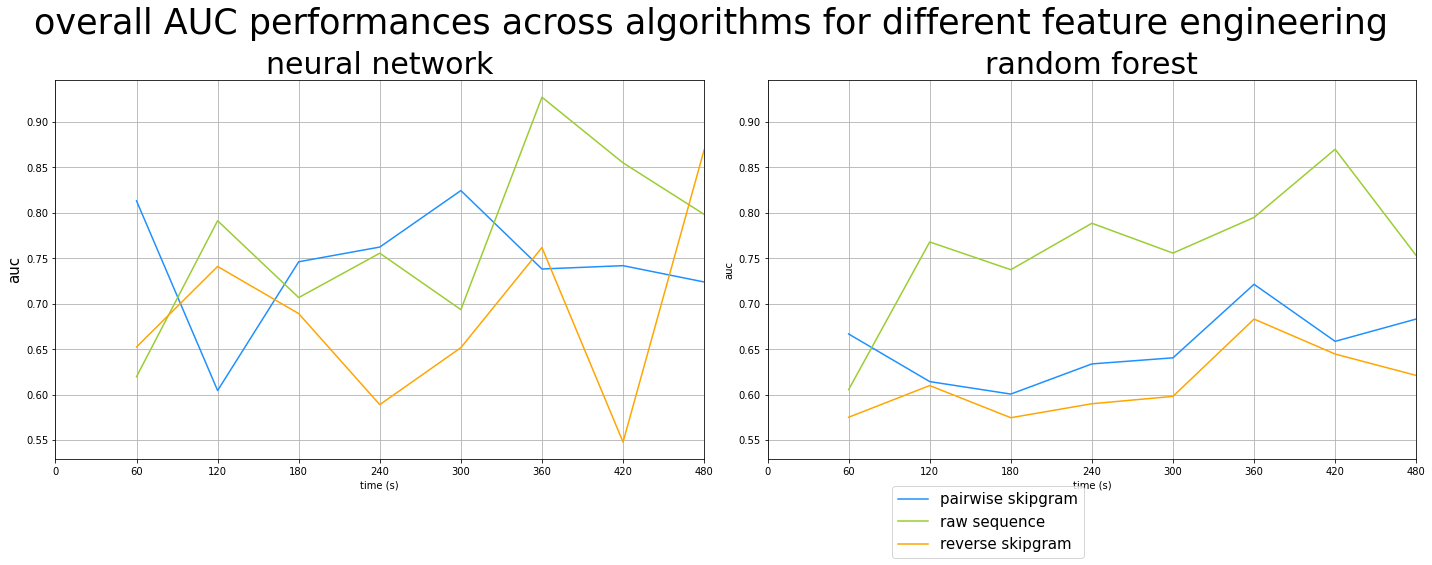

In [69]:
directory = '../Objects/results/seconds - no padding/'
algo_plotter.plotAcrossAlgo(directory, 'auc', 'overall', save_figure=True, show_figure=True)                                               

In [130]:
plotter = PredictionPlotter.PredictionPlotter('hello')

In [75]:
with open(directory + 'interactionspadding_rf_classification_static.pkl', 'rb') as fp:
    raw = pickle.load(fp)

In [80]:
len(range(60, 481, 60))

8

**************************************************
- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 


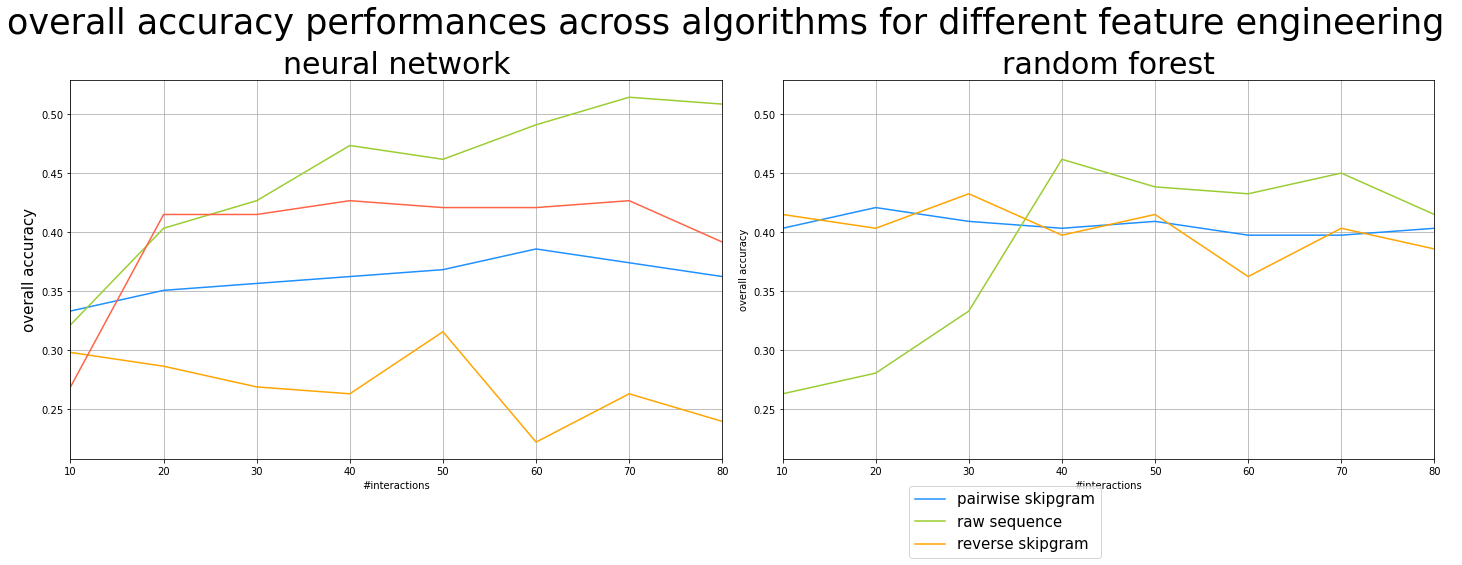

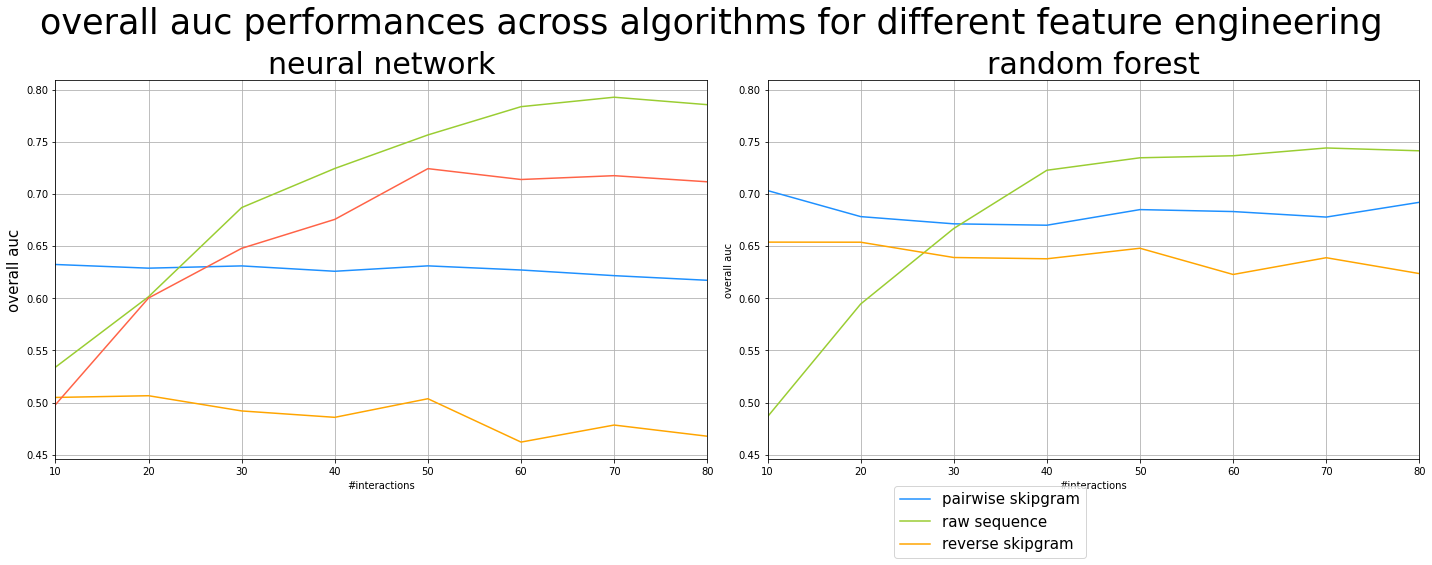

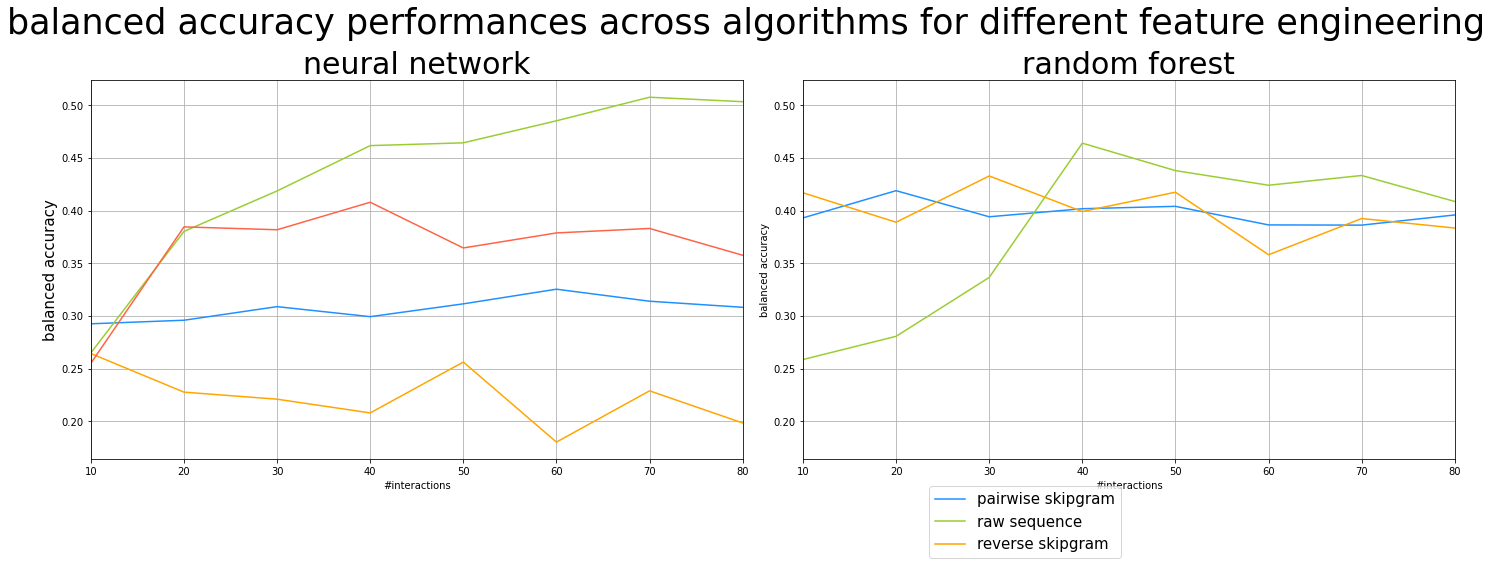

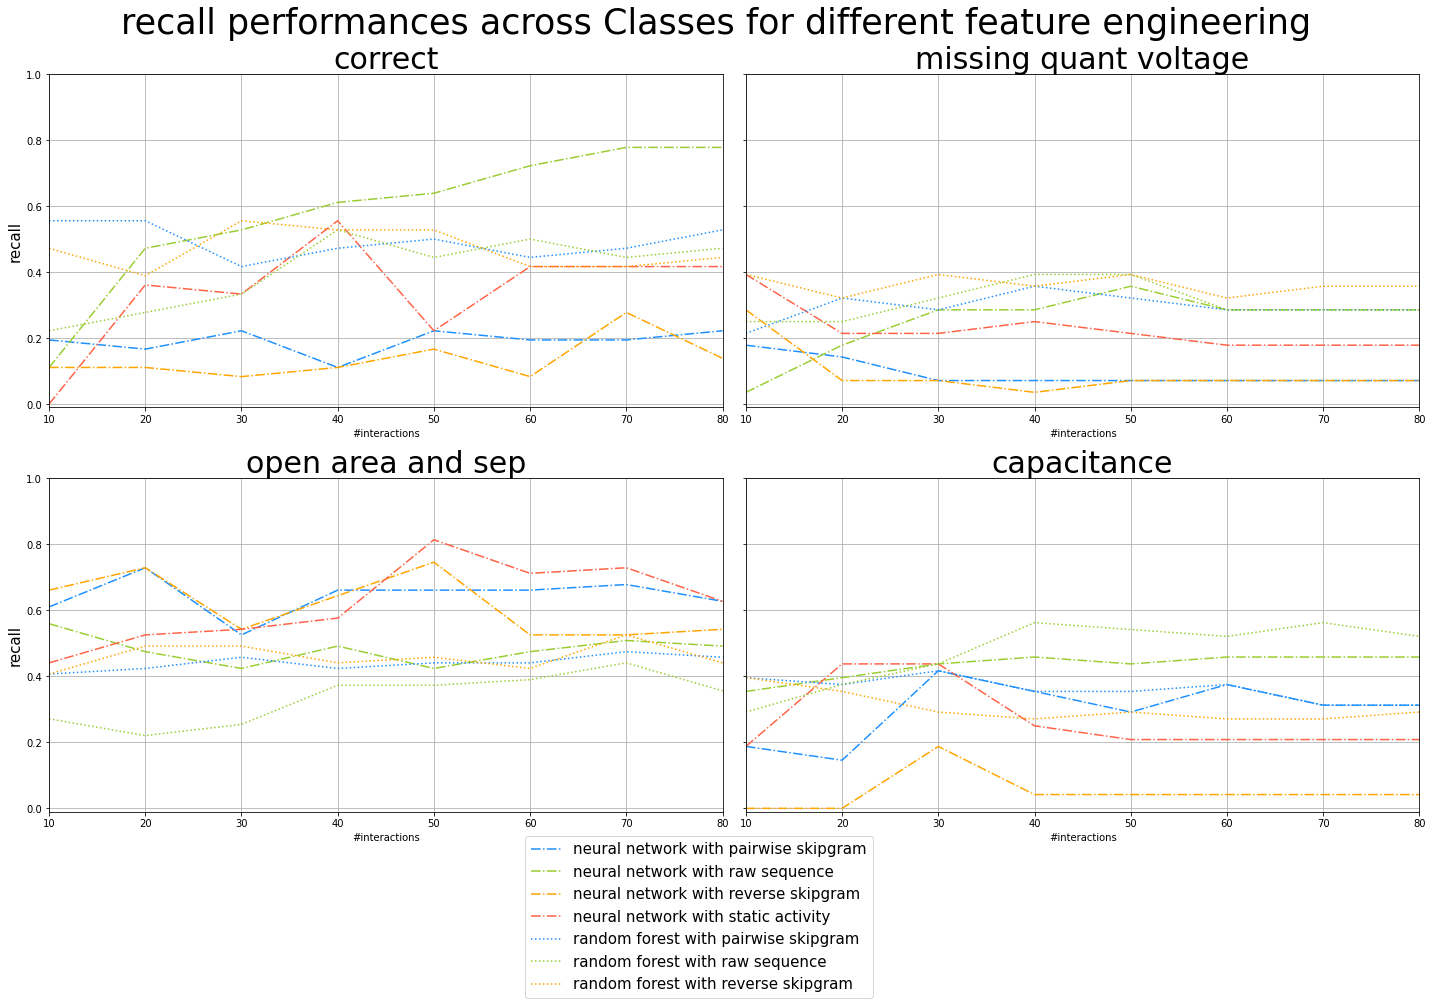

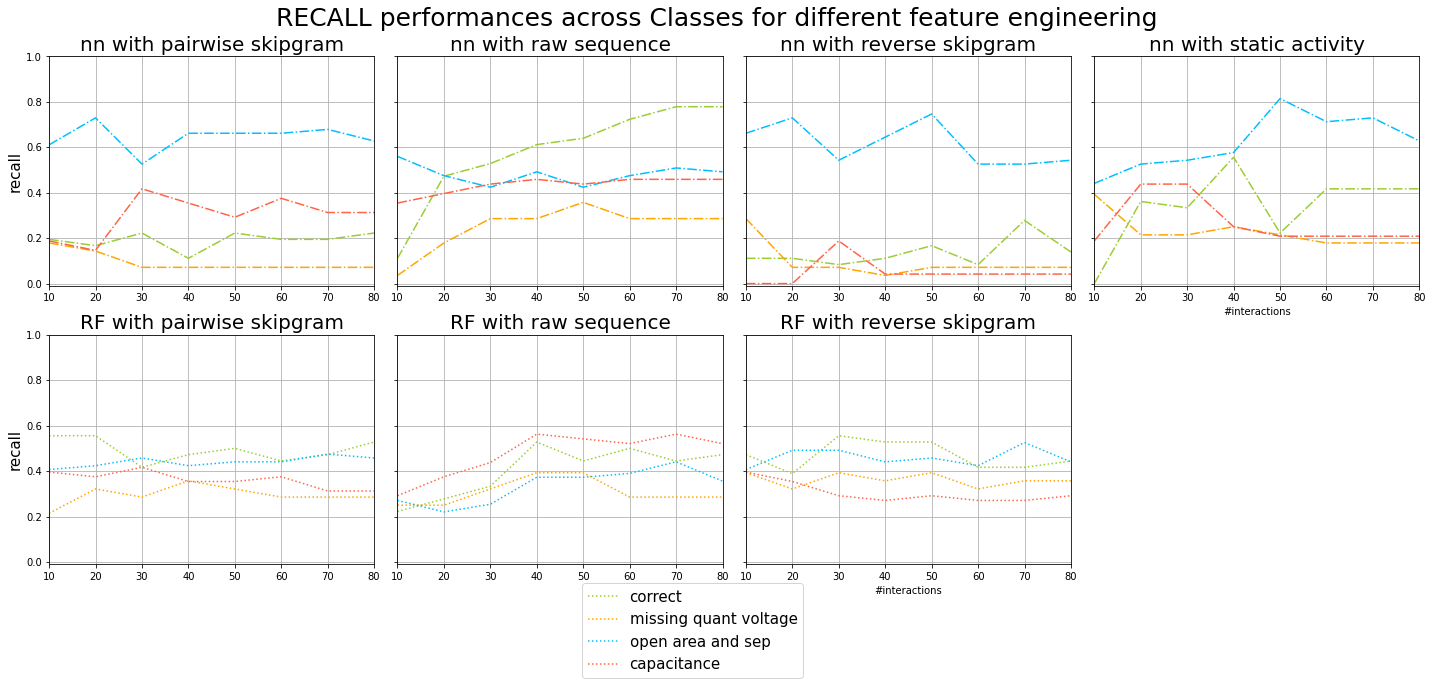

In [83]:
lengths = list(range(10, 90, 10))
directory = '../Objects/predictions/interactions - padding/'
print('*' * 50)
print('- ' * 25)
plotter.plotAcrossAlgo(directory, lengths, 'overall accuracy', show_figure=True, 
                       xlims=[10, 80], xticks=lengths, xlabel='#interactions')
print('- ' * 25)
plotter.plotAcrossAlgo(directory, lengths, 'overall auc', show_figure=True, 
                       xlims=[10, 80], xticks=lengths, xlabel='#interactions')
print('- ' * 25)

plotter.plotAcrossAlgo(directory, lengths, 'balanced accuracy', show_figure=True, 
                       xlims=[10, 80], xticks=lengths, xlabel='#interactions')
# print('*' * 50)
plotter.plotAcrossClass(directory, lengths, 'recall', show_figure=True, 
                        xlims=[10, 80], xticks=lengths, xlabel='#interactions')
# print('*' * 50)
plotter.plotAcrossAlgoFeature(directory, lengths, 'recall', show_figure=True, 
                              xlims=[10, 80], xticks=lengths, xlabel='#interactions')

**************************************************
- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 


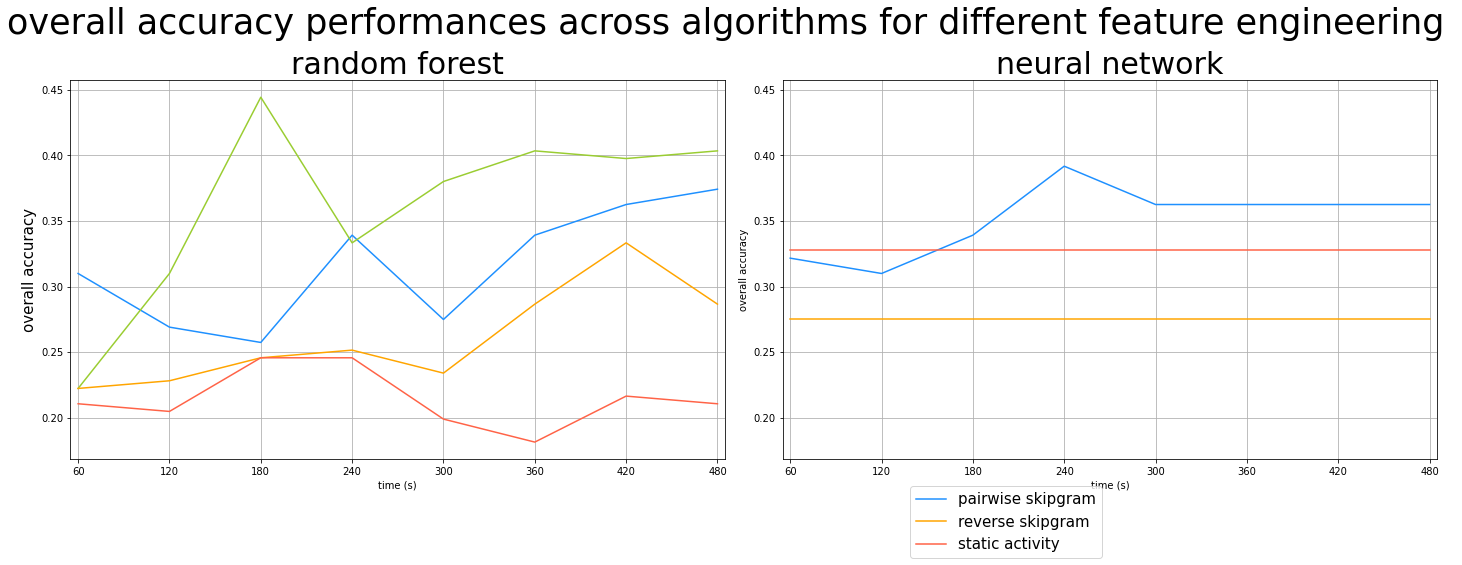

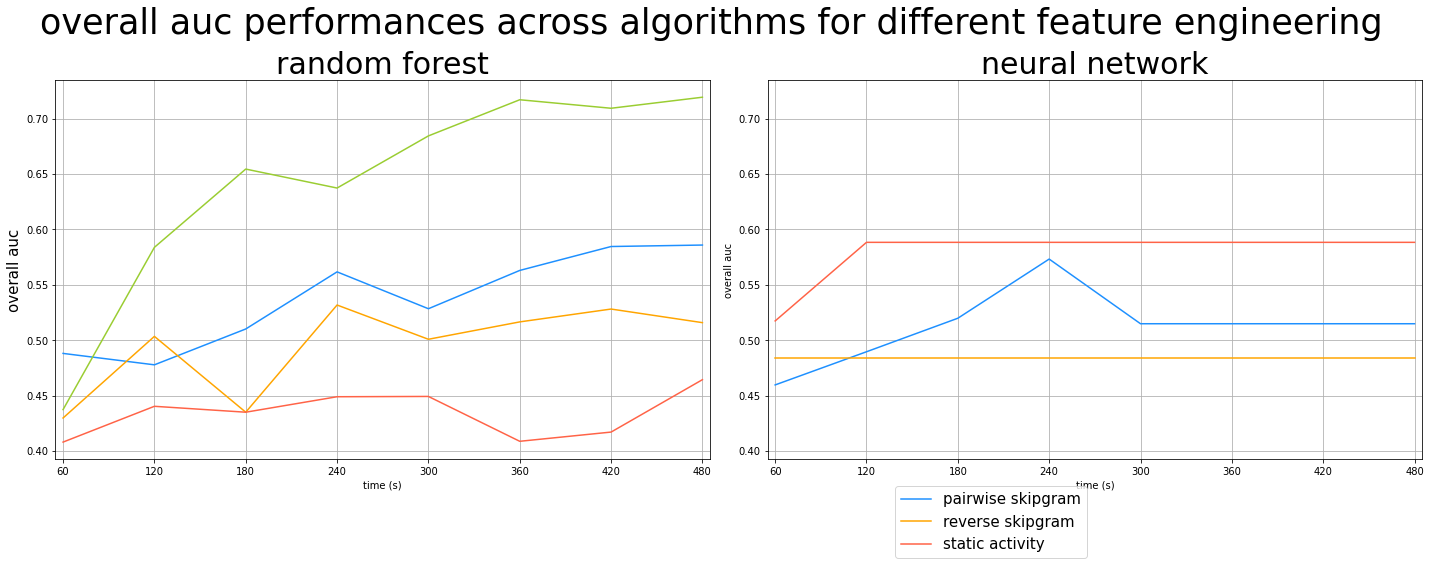

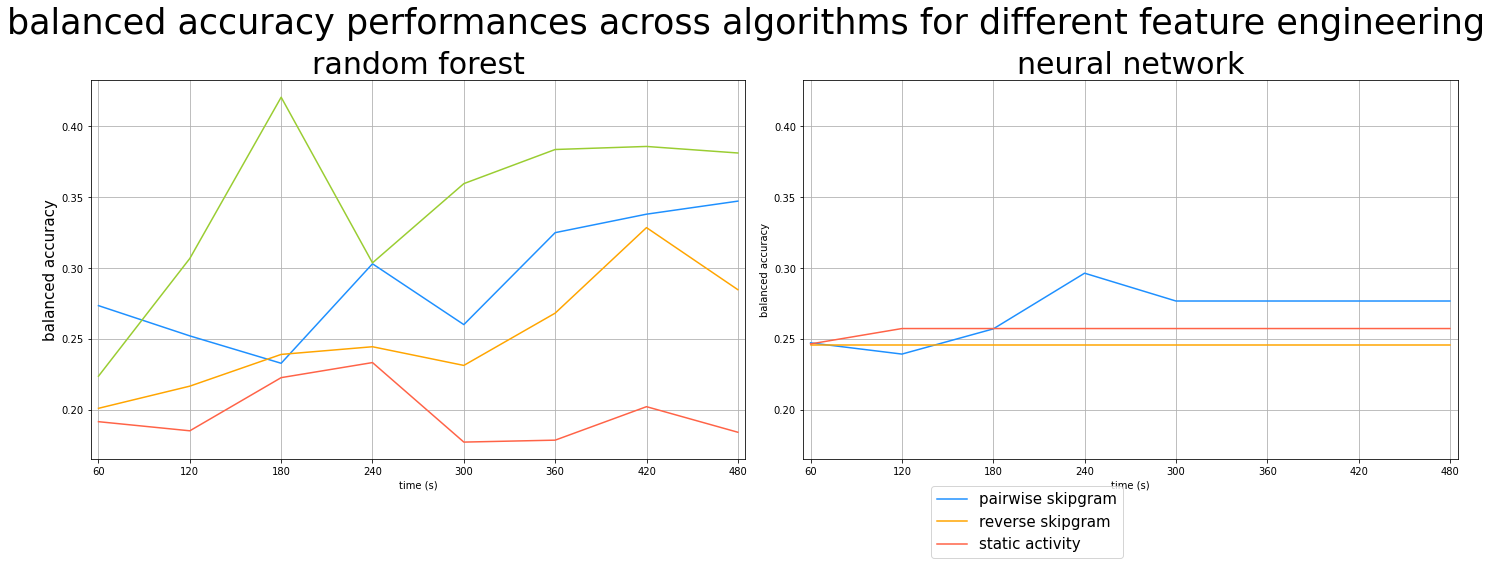

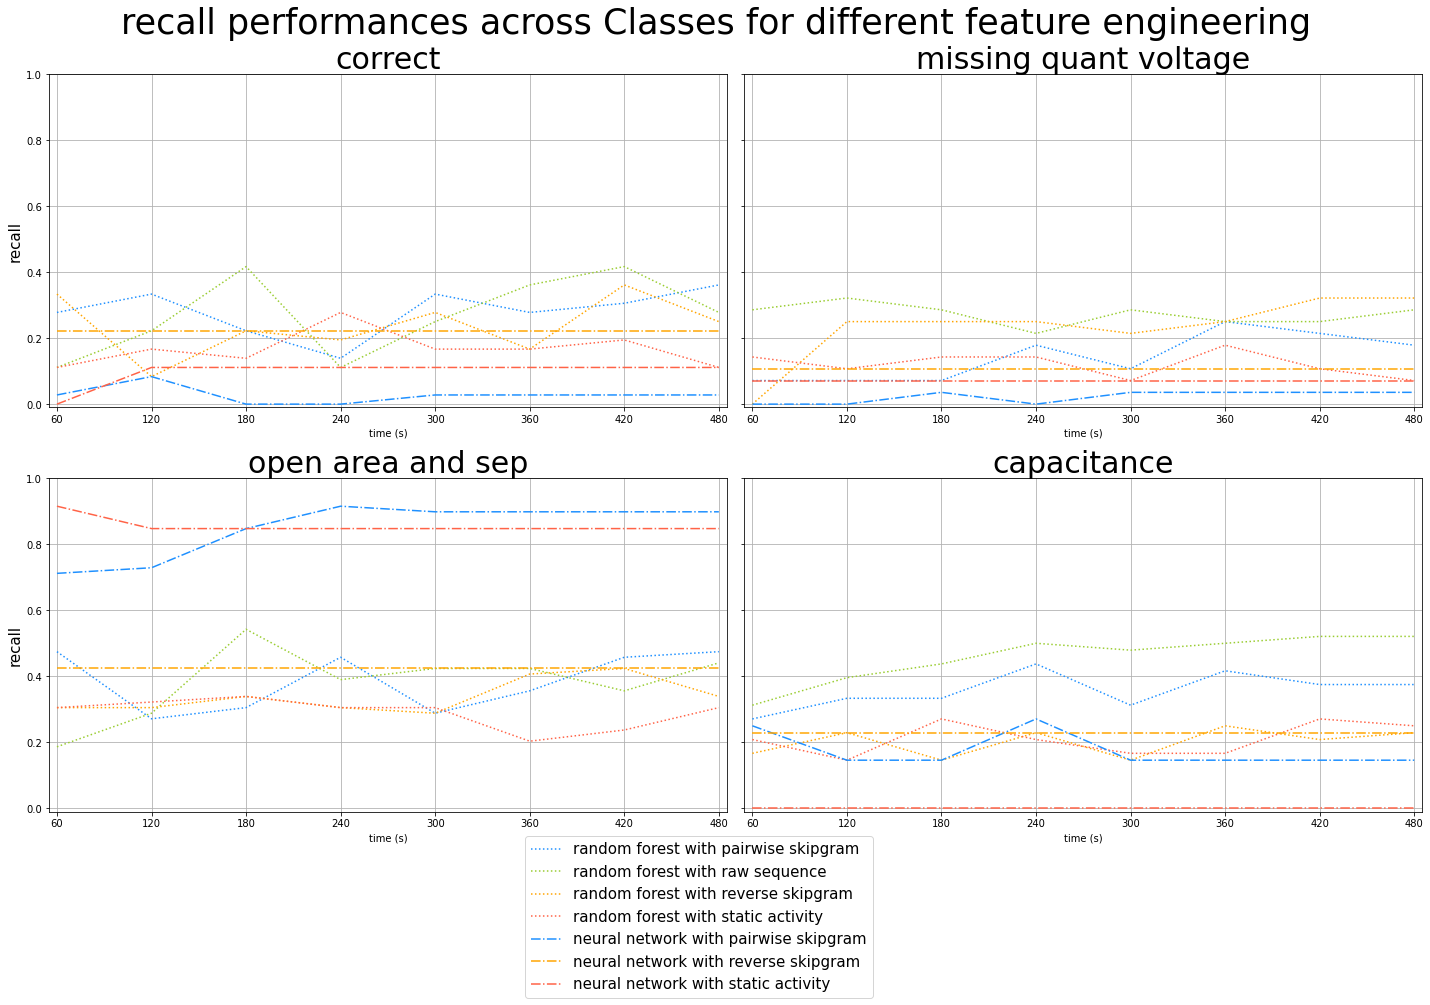

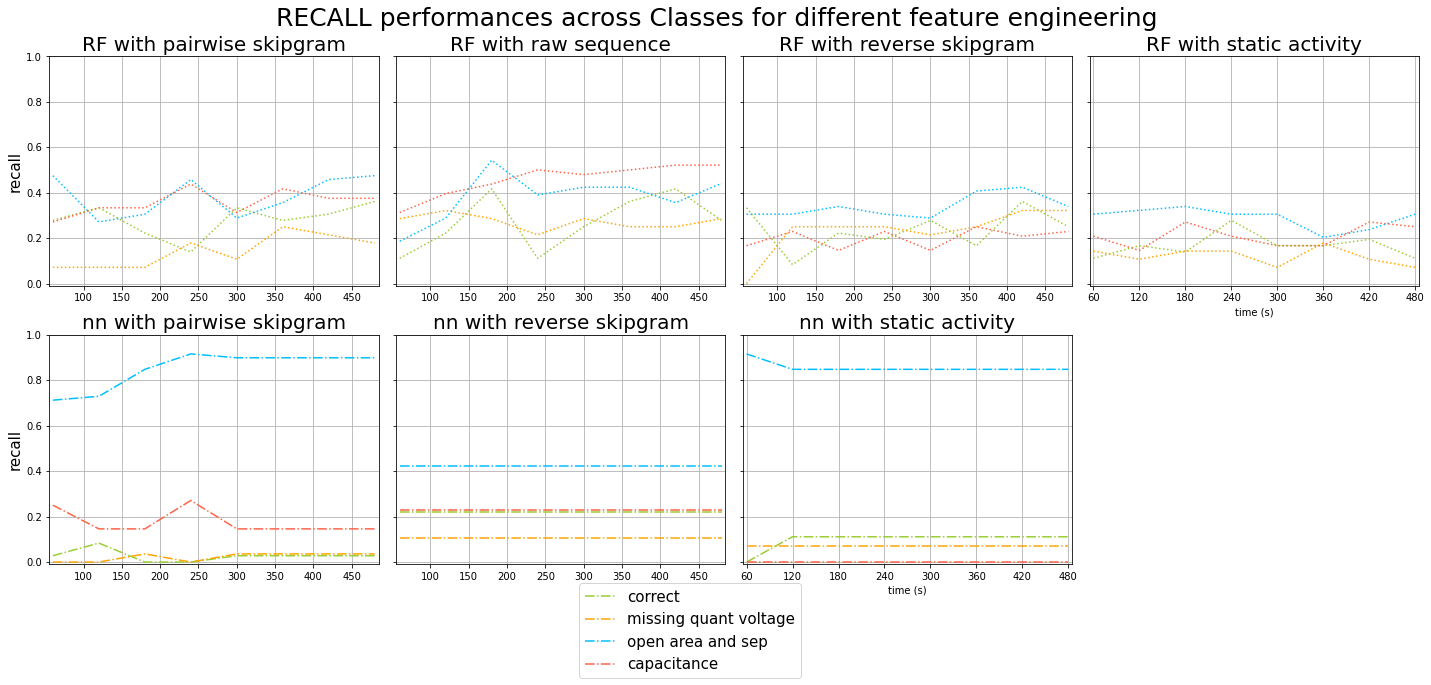

In [86]:
lengths = list(range(60, 481, 60))
directory = '../Objects/predictions/seconds - padding/'
print('*' * 50)
print('- ' * 25)
plotter.plotAcrossAlgo(directory, lengths, 'overall accuracy', show_figure=True, 
                       xlims=[55, 485], xticks=lengths)
print('- ' * 25)
plotter.plotAcrossAlgo(directory, lengths, 'overall auc', show_figure=True, 
                       xlims=[55, 485], xticks=lengths)
print('- ' * 25)

plotter.plotAcrossAlgo(directory, lengths, 'balanced accuracy', show_figure=True, 
                       xlims=[55, 485], xticks=lengths)
# print('*' * 50)
plotter.plotAcrossClass(directory, lengths, 'recall', show_figure=True, 
                        xlims=[55, 485], xticks=lengths)
# print('*' * 50)
plotter.plotAcrossAlgoFeature(directory, lengths, 'recall', show_figure=True, 
                              xlims=[55, 485], xticks=lengths)

**************************************************
- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 
{0: array([0]), 1: array([2]), 2: array([], dtype=float64), 3: array([], dtype=float64)}
[[0.04444444 0.89470899 0.06084656]
 [0.04444444 0.89470899 0.06084656]
 [0.32901235 0.65709877 0.01388889]
 [0.04444444 0.89470899 0.06084656]
 [0.67037037 0.2787037  0.05092593]
 [0.04444444 0.89470899 0.06084656]
 [0.49160562 0.49984737 0.00854701]
 [0.56991249 0.38450346 0.04558405]
 [0.74451567 0.15434473 0.1011396 ]
 [0.56991249 0.38450346 0.04558405]
 [0.2691358  0.59440035 0.13646384]
 [0.57067007 0.35007585 0.07925408]
 [0.74451567 0.15434473 0.1011396 ]
 [0.66991249 0.28450346 0.04558405]
 [0.44290123 0.55709877 0.        ]]
[2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2]
[3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0]
[[0.04444444 0.         0.06084656 0.        ]
 [0.04444444 0.         0.06084656 0.        ]
 [0.32901235 0.         0.01388

ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

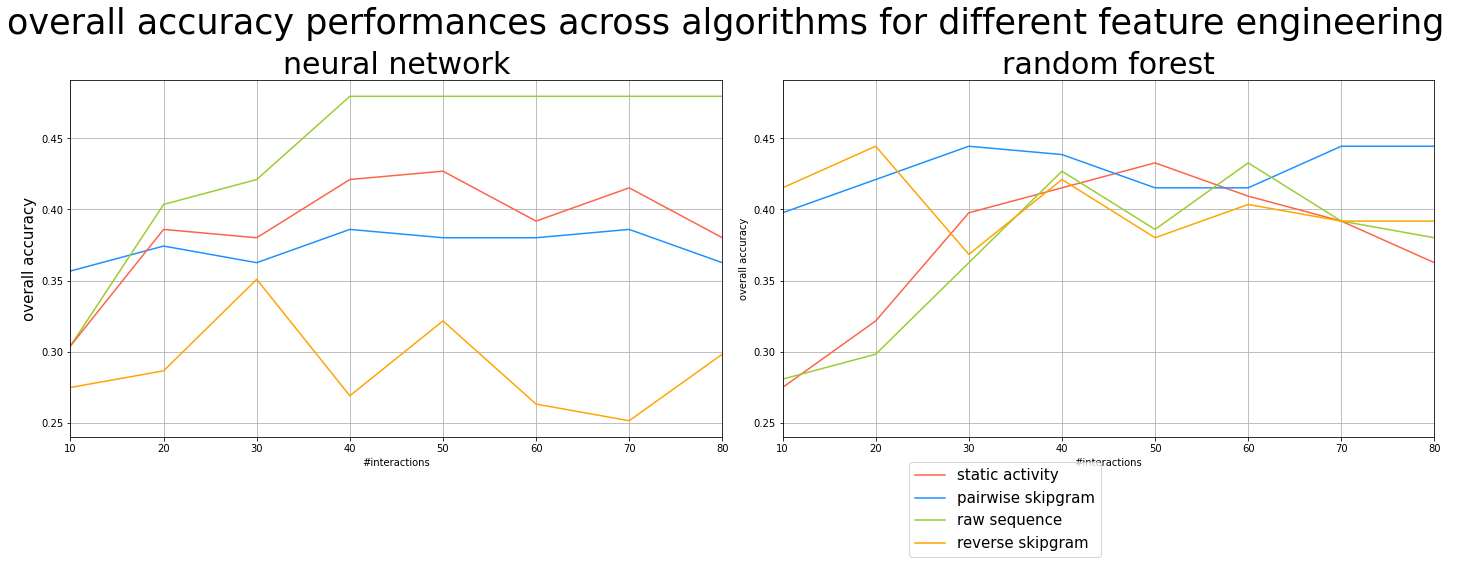

In [140]:
lengths = list(range(10, 90, 10))
directory = '../Objects/predictions/interactions - no padding/'
print('*' * 50)
print('- ' * 25)
plotter.plotAcrossAlgo(directory, lengths, 'overall accuracy', show_figure=True, 
                       xlims=[10, 80], xticks=lengths, xlabel='#interactions')
print('- ' * 25)
plotter.plotAcrossAlgo(directory, lengths, 'overall auc', show_figure=True, 
                       xlims=[10, 80], xticks=lengths, xlabel='#interactions')
print('- ' * 25)

plotter.plotAcrossAlgo(directory, lengths, 'balanced accuracy', show_figure=True, 
                       xlims=[10, 80], xticks=lengths, xlabel='#interactions')
# print('*' * 50)
plotter.plotAcrossClass(directory, lengths, 'recall', show_figure=True, 
                        xlims=[10, 80], xticks=lengths, xlabel='#interactions')
# print('*' * 50)
plotter.plotAcrossAlgoFeature(directory, lengths, 'recall', show_figure=True, 
                              xlims=[10, 80], xticks=lengths, xlabel='#interactions')

# Timelines

In [142]:
with open('../Objects/data keys/group_id_timelines.pkl', 'rb') as fp:
    id_timelines = pickle.load(fp)

In [144]:
groups_id = {}
for iid in id_timelines:
    timeline = id_timelines[iid]
    if timeline.group not in groups_id:
        groups_id[timeline.group] = []
    groups_id[timeline.group].append(timeline)

In [150]:
for key in groups_id['correct'][0].timelines.keys():
    print(key)
    
print('*' * 50)
for key in groups_id['correct'][0].statics.keys():
    print(key)

cumulative60
cumulative80
cumul80
cumul60
cumul_60_seconds_0
cumul_60_seconds_10
cumul_60_seconds_20
cumul_60_seconds_30
cumul_60_seconds_40
cumul_60_seconds_50
cumul_60_seconds_60
cumul_60_seconds_70
cumul_60_seconds_80
cumul_60_seconds_90
cumul_60_seconds_100
cumul_60_seconds_110
cumul_60_seconds_120
cumul_60_seconds_130
cumul_60_seconds_140
cumul_60_seconds_150
cumul_60_seconds_160
cumul_60_seconds_170
cumul_60_seconds_180
cumul_60_seconds_190
cumul_60_seconds_200
cumul_60_seconds_210
cumul_60_seconds_220
cumul_60_seconds_230
cumul_60_seconds_240
cumul_60_seconds_250
cumul_60_seconds_260
cumul_60_seconds_270
cumul_60_seconds_280
cumul_60_seconds_290
cumul_60_seconds_300
**************************************************
count_60
sum_60
count_80
sum_80
count_10_60
sum_10_60
count_10_80
sum_10_80
count_20_60
sum_20_60
count_20_80
sum_20_80
count_30_60
sum_30_60
count_30_80
sum_30_80
count_40_60
sum_40_60
count_40_80
sum_40_80
count_50_60
sum_50_60
count_50_80
sum_50_80
count_60_60
sum

In [157]:
def printSequenceTimelines(group, timeline):
    for key in groups_id:
        print('*' * 50)
        print('Group:', key)
        for t in groups_id[key]:
            print('    ----')
            try:
                print('    ', t.timelines[timeline])
            except KeyError:
                print('    padding:', t.timelines['cumul60'])
            print()
            
def printStaticTimelines(group, timeline):
    for key in groups_id:
        print('*' * 50)
        print('Group:', key)
        for t in groups_id[key]:
            print('    ----')
            try:
                print('    ', t.statics[timeline])
            except KeyError:
                print('    padding:', t.statics['sum_60'])
            print()

In [155]:
printTimelines('correct', 'cumul80')

**************************************************
Group: capacitance
    ----
     ['other', 'break', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'se_bc_platearea', 'se_bc_plateseparation', 'other', 'other', 'se_bc_voltage', 'se_bc_plateseparation', 'se_bc_plateseparation', 'se_bc_plateseparation', 'break', 'se_bc_voltage', 'se_bc_voltage', 'se_bc_platearea', 'se_bc_plateseparation', 'break', 'se_voltage', 'se_voltage', 'other', 'se_bc_voltage', 'se_bc_voltage', 'other', 'se_bc_platearea', 'se_bc_platearea', 'se_bc_platearea', 'break', 'se_bc_plateseparation', 'se_bc_platearea', 'se_bc_platearea', 'break', 'se_bc_platearea', 'break', 'se_bc_platearea', 'se_bc_plateseparation', 'se_bc_platearea', 'se_bc_plateseparation', 'se_bc_platearea', 'break', 'other', 'other', 'other', 'other', 'other', 'other', 'other']

    ----
     ['other', 'break', 'bc_voltage', 'bc_voltage', 'bc_voltage', 'bc_voltage', 'bc_voltage', 'bc_voltage', 'break', 'bc_plateseparation', '

In [158]:
printStaticTimelines('correct', 'sum_30_60')

**************************************************
Group: capacitance
    ----
     {'break': 120.84200000000001, 'other': 12.025000000000002, 'se_bc_platearea': 5.198999999999998, 'se_bc_plateseparation': 11.658000000000008, 'se_bc_voltage': 3.2590000000000074, 'se_voltage': 1.2650000000000148}

    ----
     {'bc_platearea': 4.094999999999999, 'bc_plateseparation': 17.864000000000004, 'bc_voltage': 10.15700000000001, 'break': 164.35000000000002, 'other': 1.3540000000000134, 'plateseparation': 8.84299999999999, 'voltage': 1.4490000000000123}

    ----
     {'break': 119.573, 'other': 7.274000000000018, 'se_bc_platearea': 13.788000000000011, 'se_bc_plateseparation': 9.616000000000042, 'se_bc_voltage': 8.584000000000003}

    ----
     {'other': 0.3499999999999801}

    ----
     {'bc_platearea': 3.028000000000013, 'bc_plateseparation': 7.6939999999999955, 'break': 96.39899999999999, 'other': 0.3500000000000796}

    ----
     {'bc_platearea': 2.9620000000000033, 'break': 144.001, 'othe